# ATP-2 Graph Mining

Game of Thrones é uma das séries de TV mais populares dos últimos tempos baseada em uma coleção de livros chamada As Crônicas de Gelo e Fogo, de George R. R. Martin. A série possui 8 temporadas que cobrem os 5 volumes da coleção de livros.

Com base nos roteiros da série, foi construída uma rede complexa que representa as relações de interação entre os personagens a partir de vértices e arestas. Nesta rede, é estabelecida uma conexão entre o Personagem A e o Personagem B nas seguintes situações:

Personagem A fala após o Personagem B;

Personagem A fala sobre o Personagem B;

Personagem C fala sobre o Personagem A e Personagem B;

Personagem A e o Personagem B aparecem juntos em uma mesma cena.

Considerando as relações apresentadas acima, os arquivos "got-s1-edges.csv" e "got-s8-edges.csv" apresentam a lista de arestas estabelecidas entre os personagens durante todos os episódios da primeira e da oitava temporada da série, respectivamente. Cada arquivo possui 3 colunas, sendo elas: Source (Personagem A), Target (Personagem B) e Weight, que representa a quantidade de interações entre os personagens a partir do peso das conexões. Por exemplo, na primeira temporada os personagens NED e ROBERT tiveram um total de 192 interações, enquanto na temporada 8 foram somente 2 interações. Em ambos os casos, os grafos são não direcionados, ou seja, as interações entre o Personagem A e B são as mesmas que entre o Personagem B e A.

Diante deste contexto, escreva um relatório sucinto comparando a rede da primeira temporada ("got-s1-edges.csv") com a rede da segunda temporada ("got-s8-edges.csv"). Para isso, realize as seguintes tarefas:

In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from cdlib import algorithms, viz, evaluation


data = {
    'got-session-1': pd.read_csv('data/got-s01-edges.csv'),
    'got-session-8': pd.read_csv('data/got-s08-edges.csv'),
}

### (Tarefa 1) Discuta quais as principais diferenças entre ambas as redes com base na distribuição de graus dos vértices (apresente os gráficos de histograma), grau médio, densidade e transitividade. Para estas três medidas, apresente os valores obtidos durante a discussão.

#### 1.1 Gráficos ilustrados

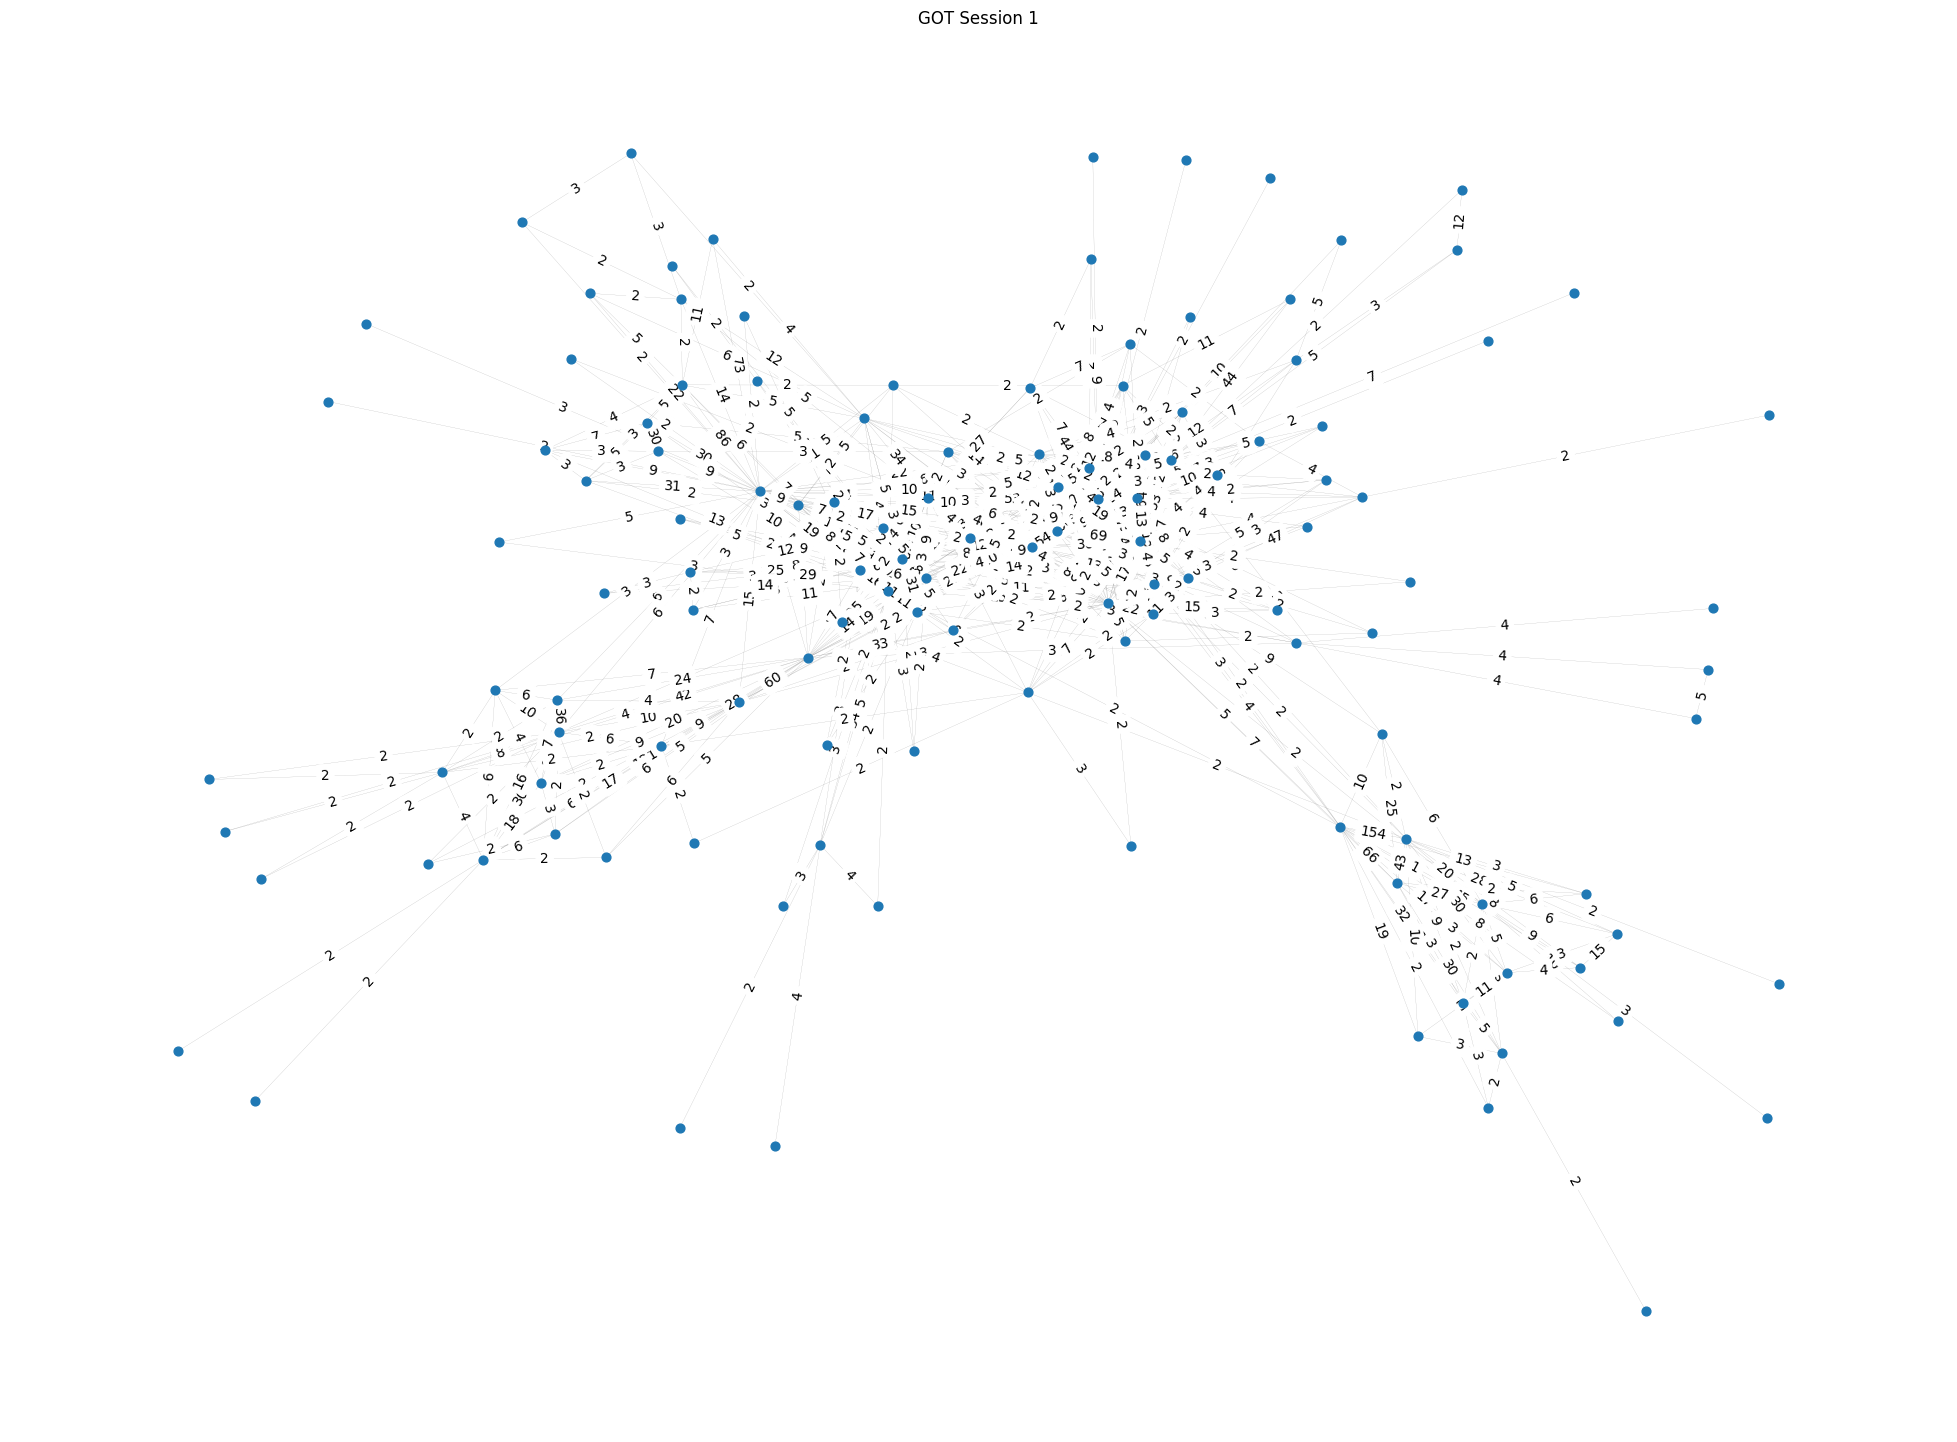

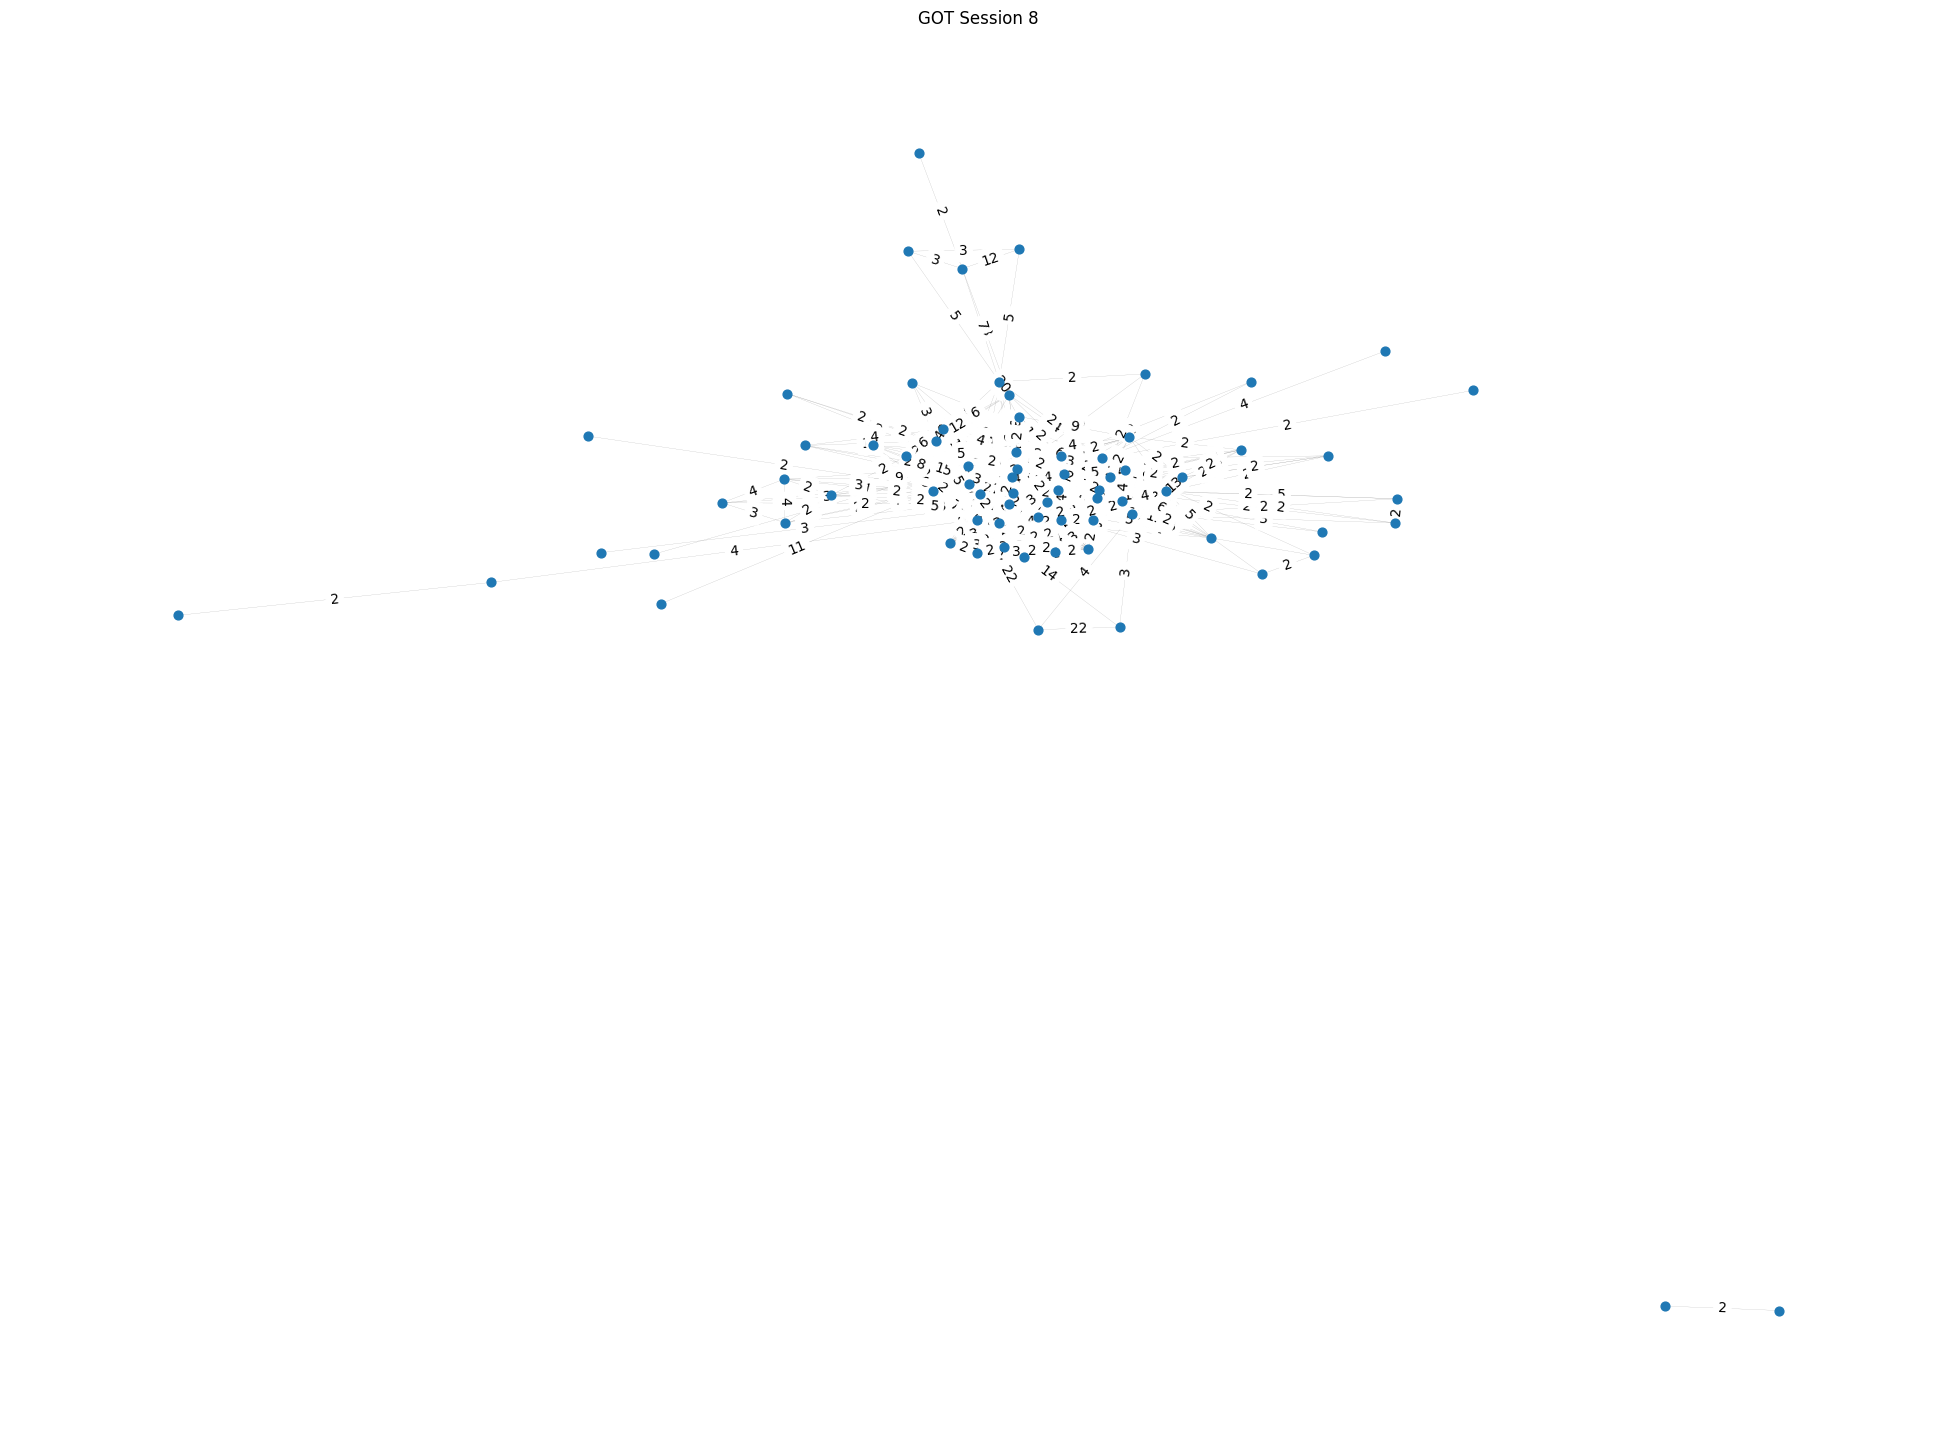

In [255]:
# should have weight
graph_session_1 = nx.from_pandas_edgelist(data['got-session-1'], 'Source', 'Target', ['Weight'])
graph_session_8 = nx.from_pandas_edgelist(data['got-session-8'], 'Source', 'Target', ['Weight'])

plt.figure(figsize=(25, 40))
plt.subplot(211)
plt.title('GOT Session 1')
pos = nx.spring_layout(graph_session_1)

nx.draw(graph_session_1, pos, node_size=40, font_size=8, font_weight='bold', edge_color='gray', width=0.1, edge_cmap=plt.cm.Blues)
edge_labels = nx.get_edge_attributes(graph_session_1, 'Weight')
nx.draw_networkx_edge_labels(graph_session_1, pos, edge_labels=edge_labels)

plt.figure(figsize=(25, 40))
plt.subplot(211)
plt.title('GOT Session 8')
pos = nx.spring_layout(graph_session_8)

nx.draw(graph_session_8, pos, node_size=40, font_size=8,
        font_weight='bold', edge_color='gray', width=0.1, edge_cmap=plt.cm.Blues)
edge_labels = nx.get_edge_attributes(graph_session_8, 'Weight')
nx.draw_networkx_edge_labels(graph_session_8, pos, edge_labels=edge_labels)

plt.show()

#### 1.2 distribuição de graus dos vértices como histograma

Text(0.5, 1.0, 'Degree Distribution')

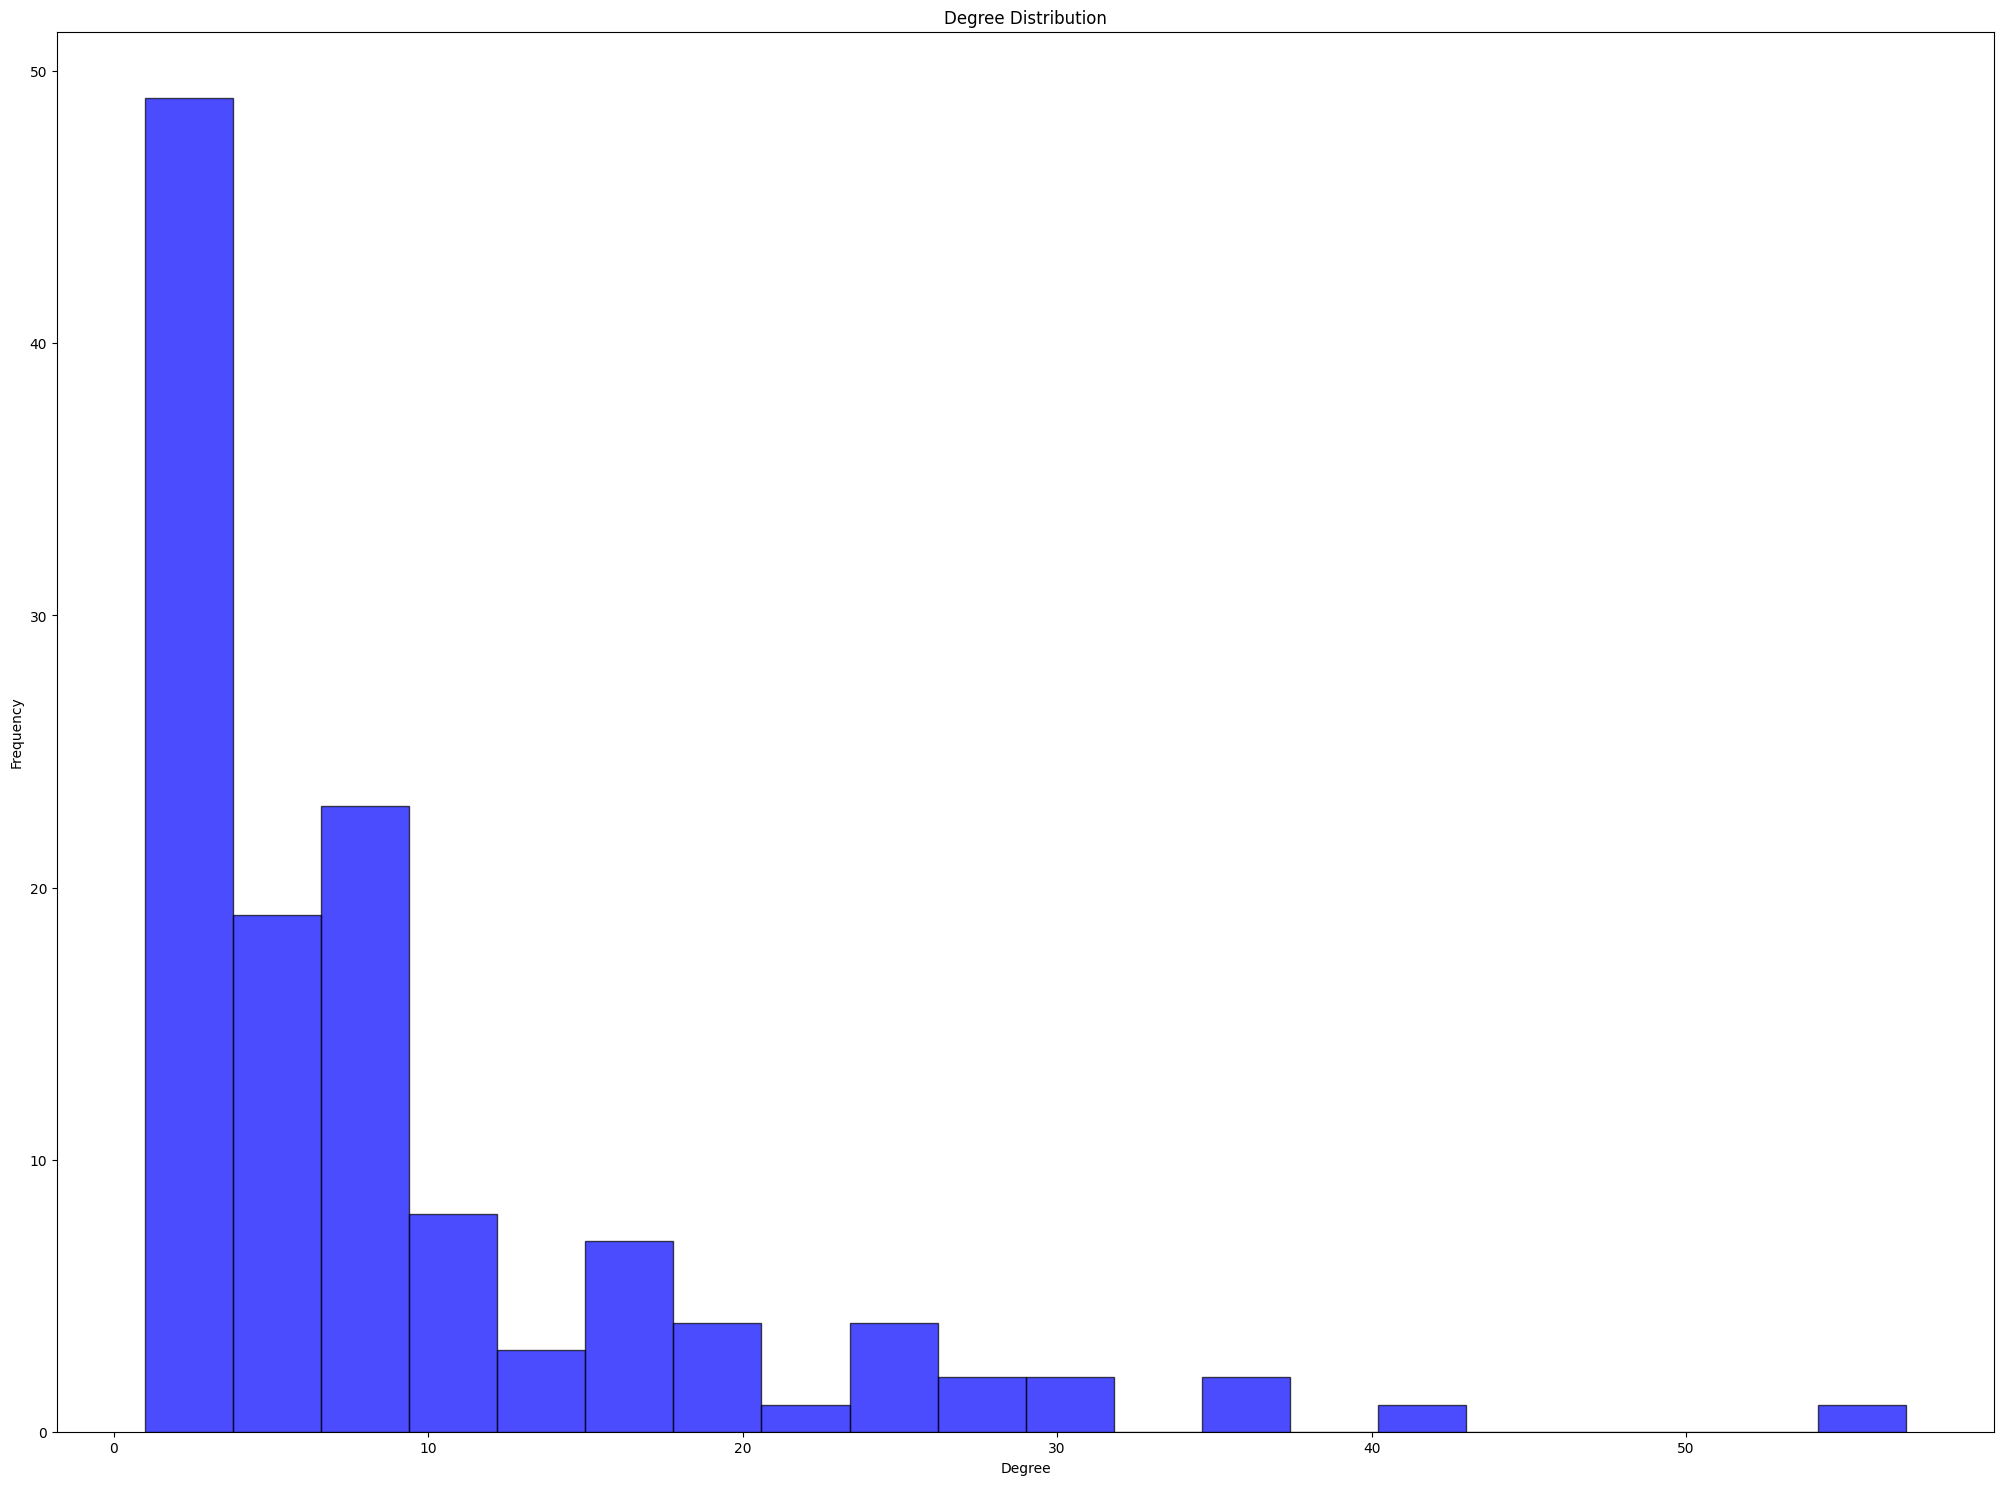

In [256]:
plt.figure(figsize=(25, 40))
plt.subplot(211)
plt.title('GOT Session 1')
degree_sequence = sorted([d for n, d in graph_session_1.degree()], reverse=True)

plt.hist(degree_sequence, bins=20, alpha=0.7, color='b', edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')


Text(0.5, 1.0, 'Degree Distribution')

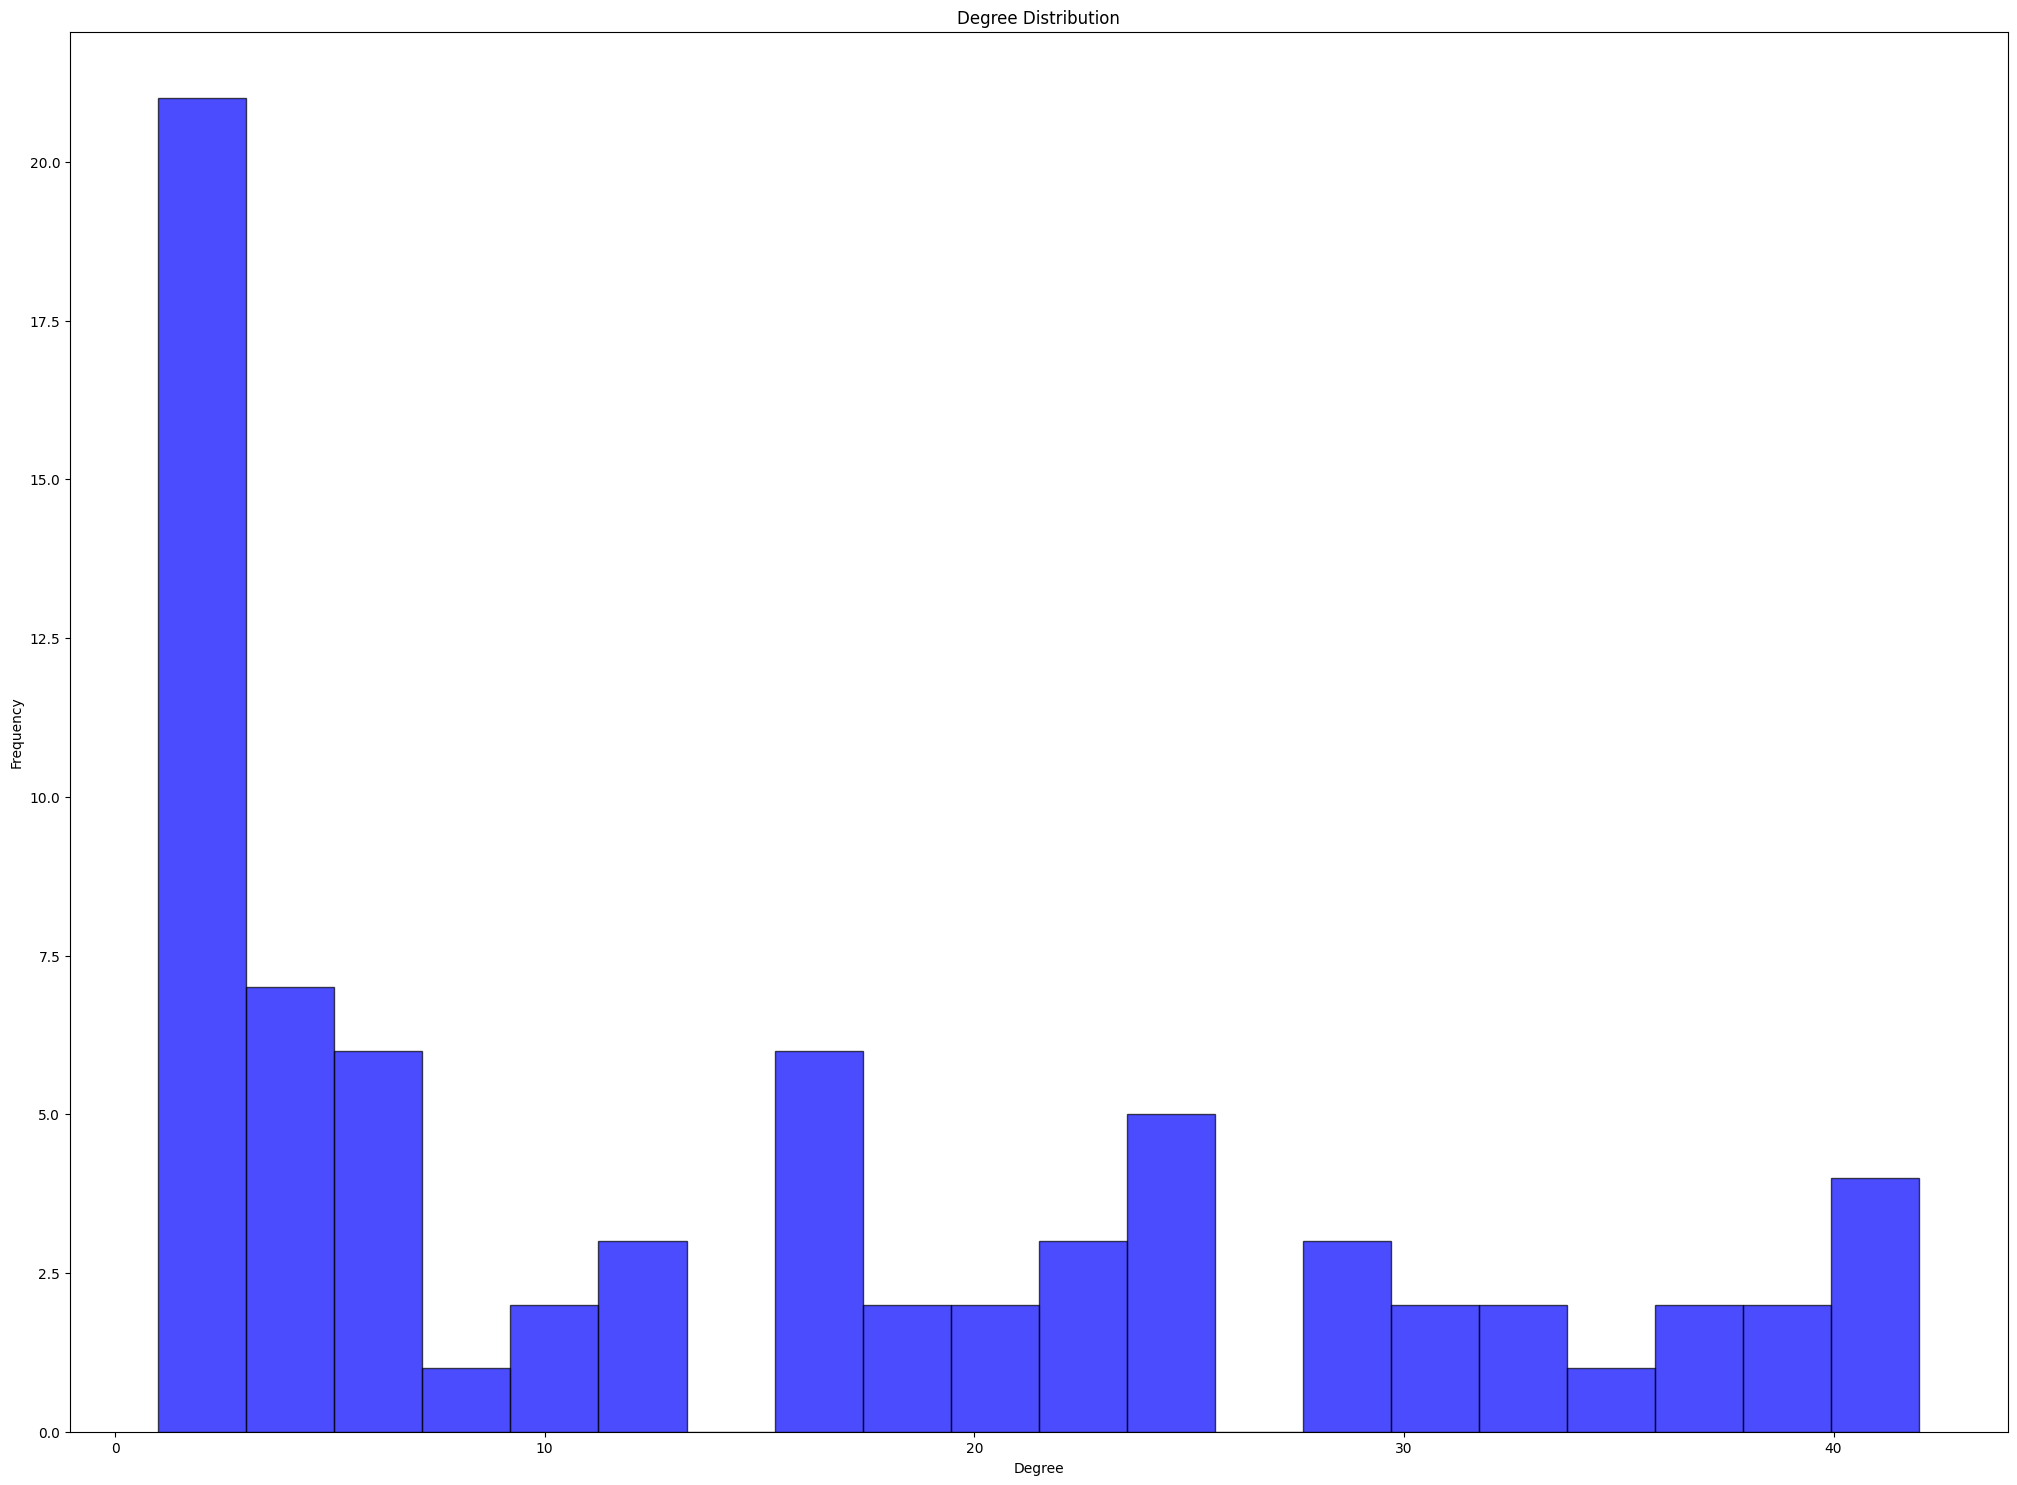

In [257]:
plt.figure(figsize=(25, 40))
plt.subplot(211)
plt.title('GOT Session 8')
degree_sequence_2 = sorted(
    [d for n, d in graph_session_8.degree()], reverse=True)

plt.hist(degree_sequence_2, bins=20, alpha=0.7, color='b', edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')

#### 1.3 Grau médio

In [258]:
print('Average degree of GOT Session 1:', np.mean(degree_sequence))
print('Average degree of GOT Session 8:', np.mean(degree_sequence_2))

Average degree of GOT Session 1: 8.714285714285714
Average degree of GOT Session 8: 14.945945945945946


#### 1.4 Densidade

In [259]:
print('Density of GOT Session 1:', nx.density(graph_session_1))
print('Density of GOT Session 8:', nx.density(graph_session_8))

Density of GOT Session 1: 0.06971428571428571
Density of GOT Session 8: 0.20473898556090336


#### 1.5 Transitividade

In [260]:
print(f'Transitivity of GOT Session 1: {nx.transitivity(graph_session_1)}')
print(f'Transitivity of GOT Session 8: {nx.transitivity(graph_session_8)}')

Transitivity of GOT Session 1: 0.38325183374083127
Transitivity of GOT Session 8: 0.6441837028505615


#### Conclusões:

A primeira rede segue a distribuição seguindo a lei de potência
A segunda rede tem uma tendência maior de ter sub grupos de personagens por conta do aumento da transitividade


### (Tarefa 2) Para cada uma das redes, identifique quem são os 3 personagens mais centrais de acordo com as medidas de centralidade de grau, intermediação, proximidade e autovetor. Algum destes personagens é central em ambas as temporadas?

In [261]:

degree_centrality = nx.degree_centrality(graph_session_1)
highest_degree_centrality = max(degree_centrality, key=degree_centrality.get)
print('Node with highest degree centrality in GOT Session 1:', highest_degree_centrality)

degree_centrality = nx.degree_centrality(graph_session_8)
highest_degree_centrality = max(degree_centrality, key=degree_centrality.get)
print('Node with highest degree centrality in GOT Session 8:', highest_degree_centrality)

betweenness_centrality = nx.betweenness_centrality(graph_session_1)
highest_betweenness_centrality = max(betweenness_centrality, key=betweenness_centrality.get)
print('Node with highest betweenness centrality in GOT Session 1:', highest_betweenness_centrality)

betweenness_centrality = nx.betweenness_centrality(graph_session_8)
highest_betweenness_centrality = max(betweenness_centrality, key=betweenness_centrality.get)
print('Node with highest betweenness centrality in GOT Session 8:', highest_betweenness_centrality)

closeness_centrality = nx.closeness_centrality(graph_session_1)
highest_closeness_centrality = max(closeness_centrality, key=closeness_centrality.get)
print('Node with highest closeness centrality in GOT Session 1:', highest_closeness_centrality)

closeness_centrality = nx.closeness_centrality(graph_session_8)
highest_closeness_centrality = max(closeness_centrality, key=closeness_centrality.get)
print('Node with highest closeness centrality in GOT Session 8:', highest_closeness_centrality)

eigenvector_centrality = nx.eigenvector_centrality(graph_session_1)
highest_eigenvector_centrality = max(eigenvector_centrality, key=eigenvector_centrality.get)
print('Node with highest eigenvector centrality in GOT Session 1:', highest_eigenvector_centrality)

eigenvector_centrality = nx.eigenvector_centrality(graph_session_8)
highest_eigenvector_centrality = max(eigenvector_centrality, key=eigenvector_centrality.get)
print('Node with highest eigenvector centrality in GOT Session 8:', highest_eigenvector_centrality)

Node with highest degree centrality in GOT Session 1: NED
Node with highest degree centrality in GOT Session 8: SAM
Node with highest betweenness centrality in GOT Session 1: NED
Node with highest betweenness centrality in GOT Session 8: DAENERYS
Node with highest closeness centrality in GOT Session 1: NED
Node with highest closeness centrality in GOT Session 8: SAM
Node with highest eigenvector centrality in GOT Session 1: NED
Node with highest eigenvector centrality in GOT Session 8: TYRION


Nenhum dos personagens é central em ambas as temporadas

### (Tarefa 3) Execute o mesmo algoritmo de detecção de comunidades (de sua preferência) nas redes das duas temporadas. Apresente o grafo com os vértices coloridos de acordo com as comunidades encontradas e com os nomes dos vértices para sua identificação. 

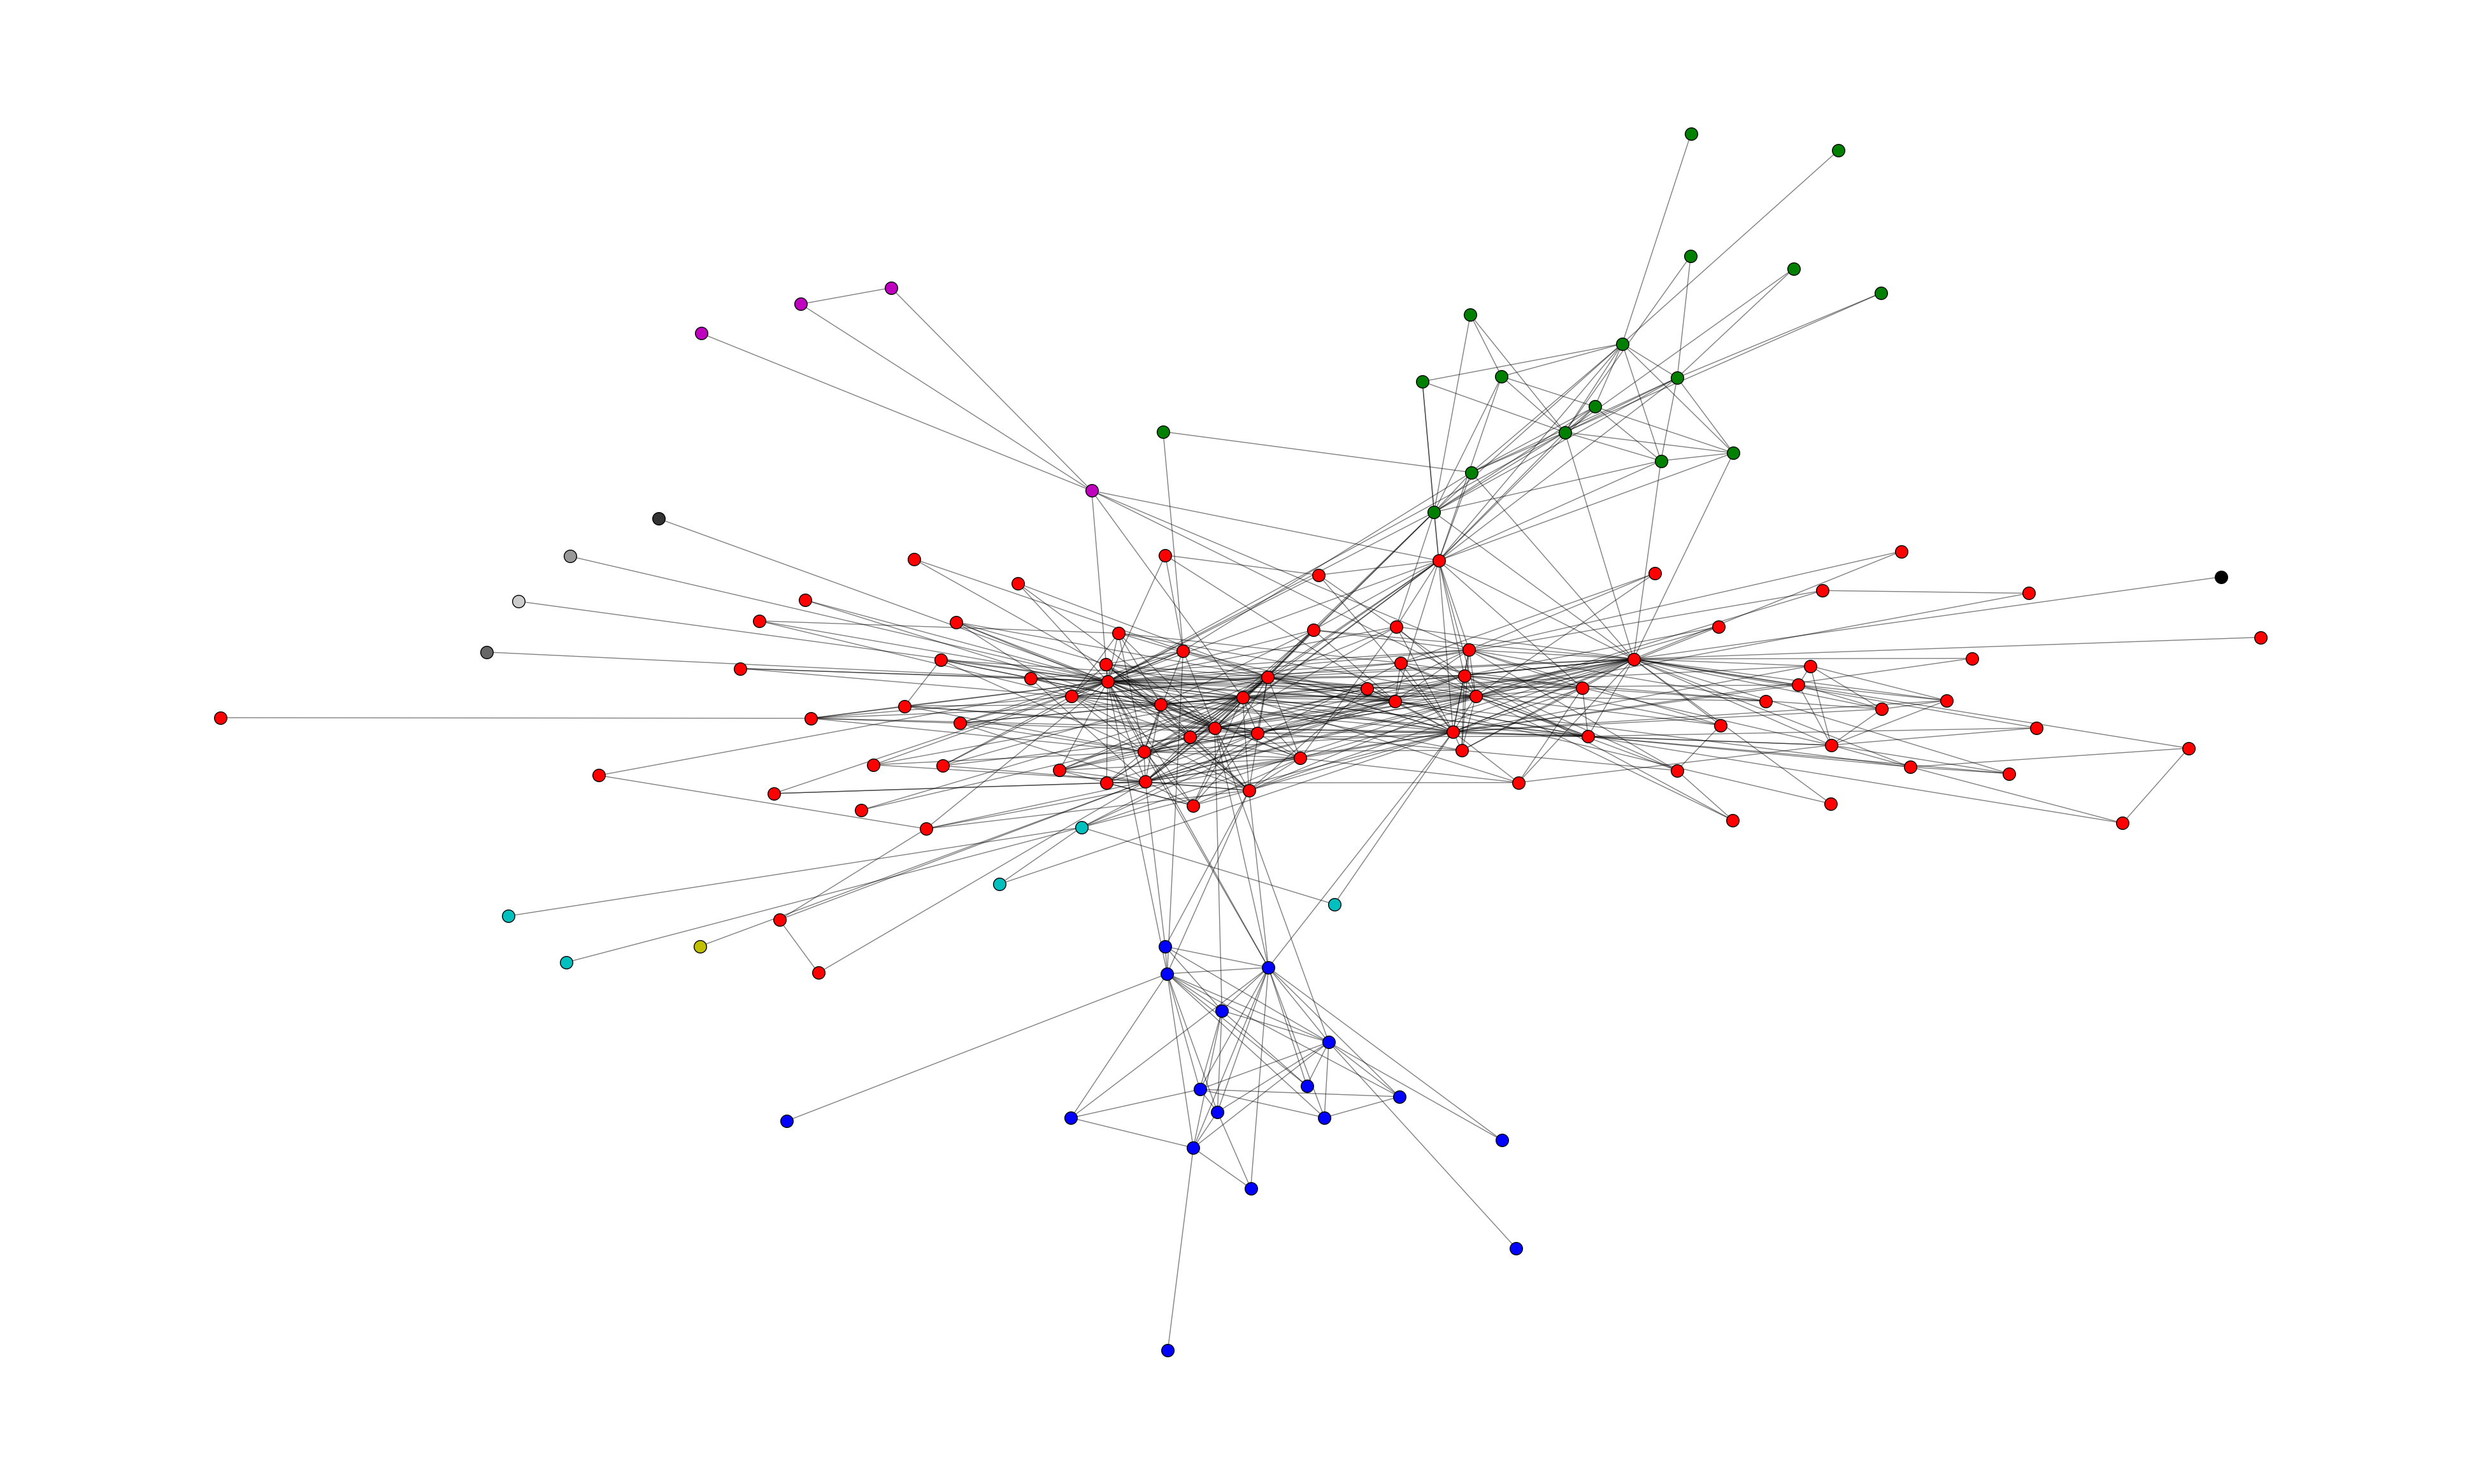

In [262]:
graph_session_1_positions = nx.spring_layout(graph_session_1)
graph_session_8_positions = nx.spring_layout(graph_session_8)

communities_graph_session_1 = algorithms.girvan_newman(graph_session_1, level=10)
communities_graph_session_8 = algorithms.girvan_newman(
    graph_session_8, level=10)


def plot(graph, communities, positions, plot_labels=True):
    viz.plot_network_clusters(
        graph, 
        communities, 
        position=positions, 
        plot_labels=plot_labels, 
        node_size=40,
        plot_overlaps=False,
        figsize=(50, 30)
    )


plot(graph_session_1, communities_graph_session_1,
     graph_session_1_positions, False)
plot(graph_session_8, communities_graph_session_8,
     graph_session_8_positions, False)

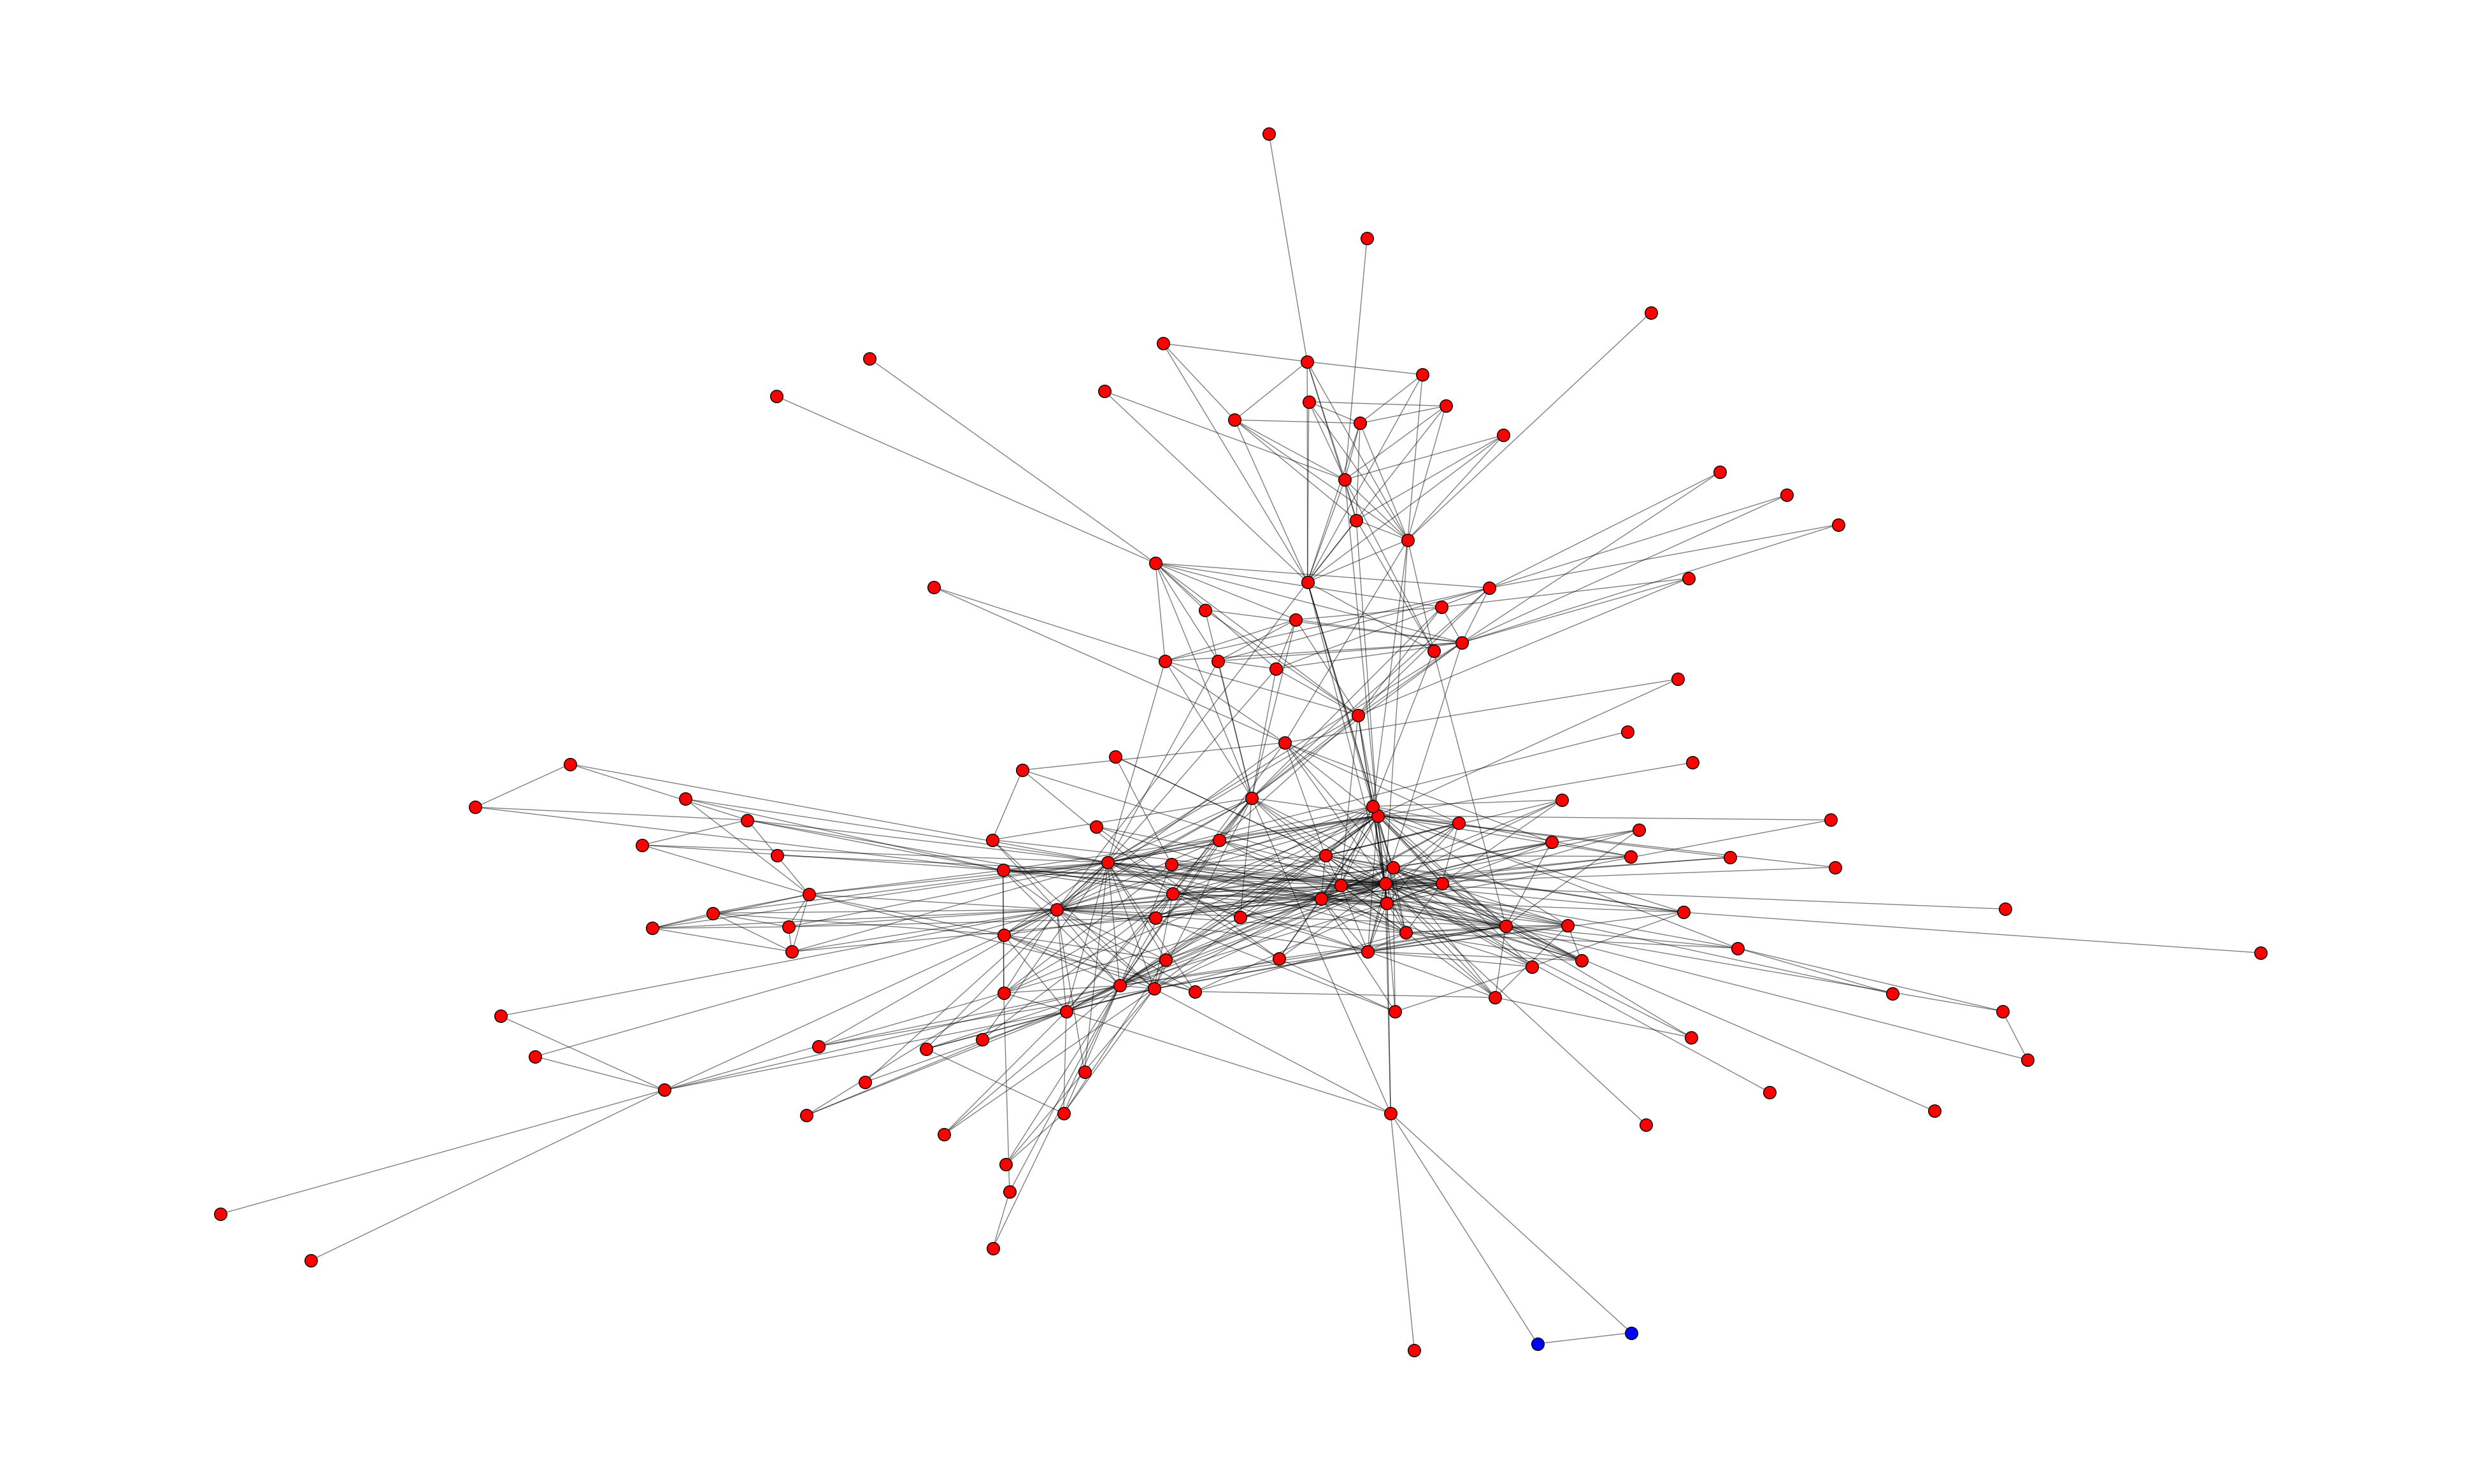

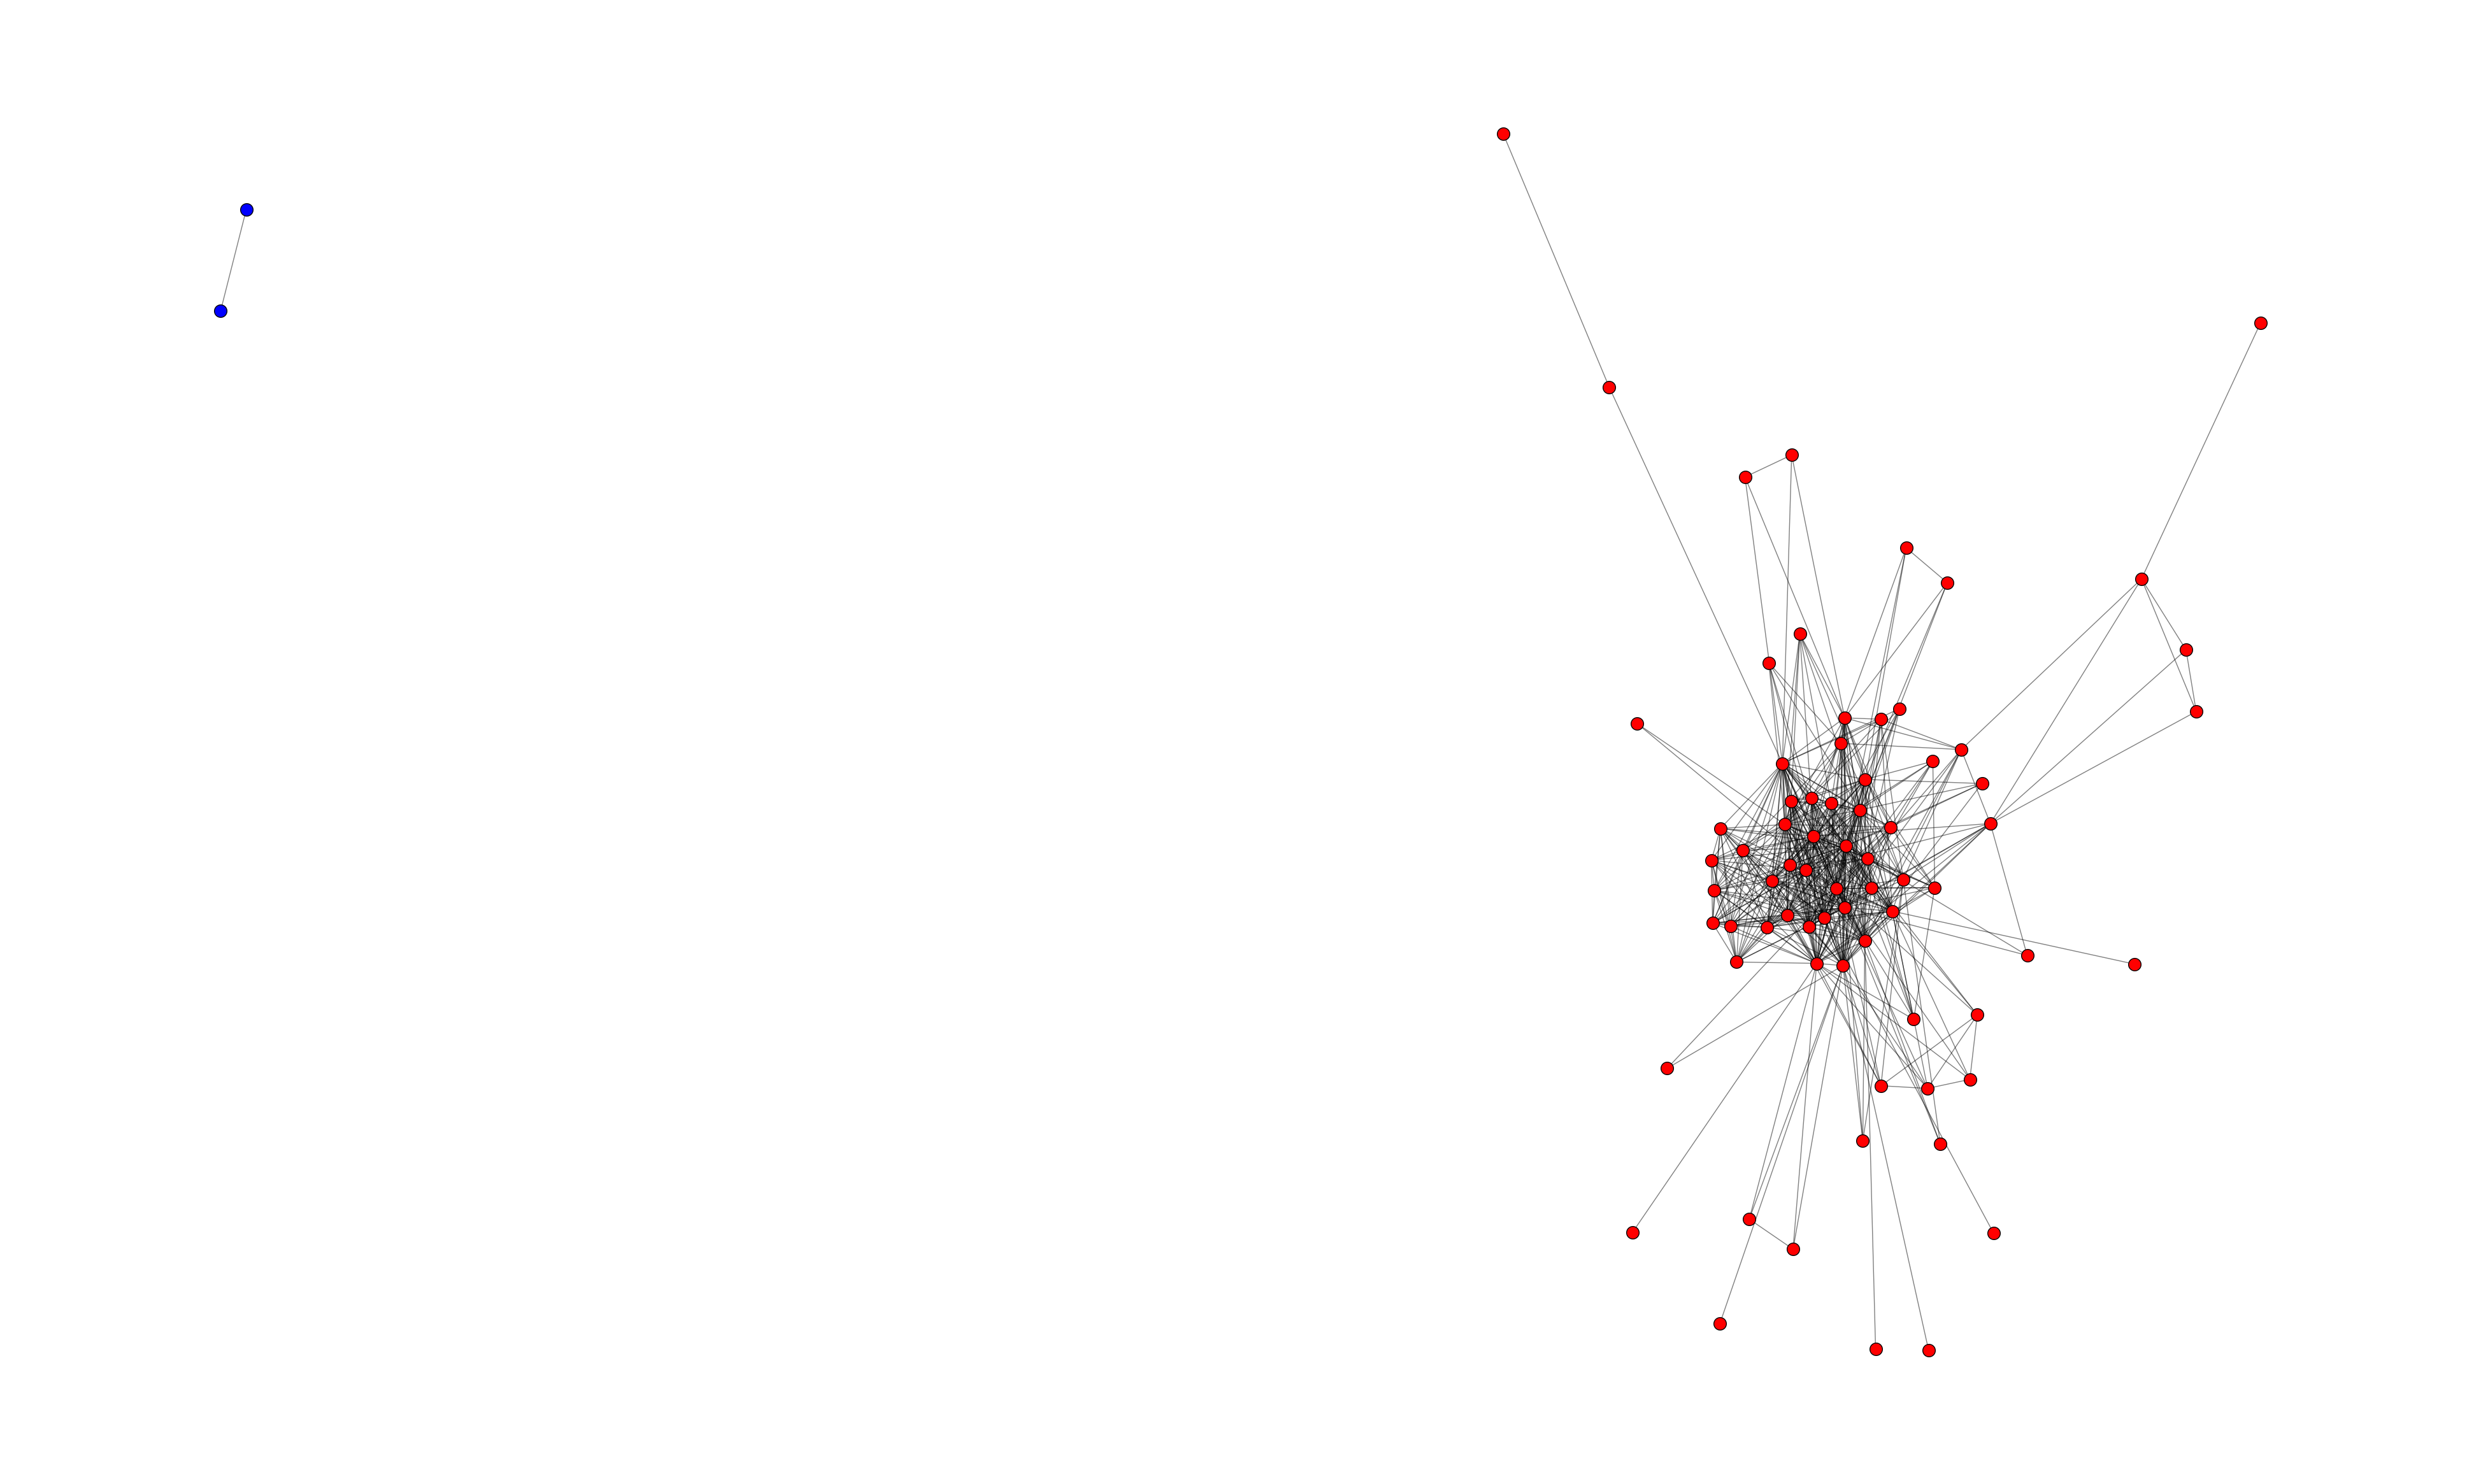

In [241]:
# Aglomerative Clauset, Newman e Moore

communities_graph_session_1 = algorithms.agdl(
    graph_session_1, number_communities=5, kc=4)
communities_graph_session_8 = algorithms.agdl(
    graph_session_8, number_communities=5, kc=4)

plot(graph_session_1, communities_graph_session_1, graph_session_1_positions, False)
plot(graph_session_8, communities_graph_session_8,
     graph_session_8_positions, False)

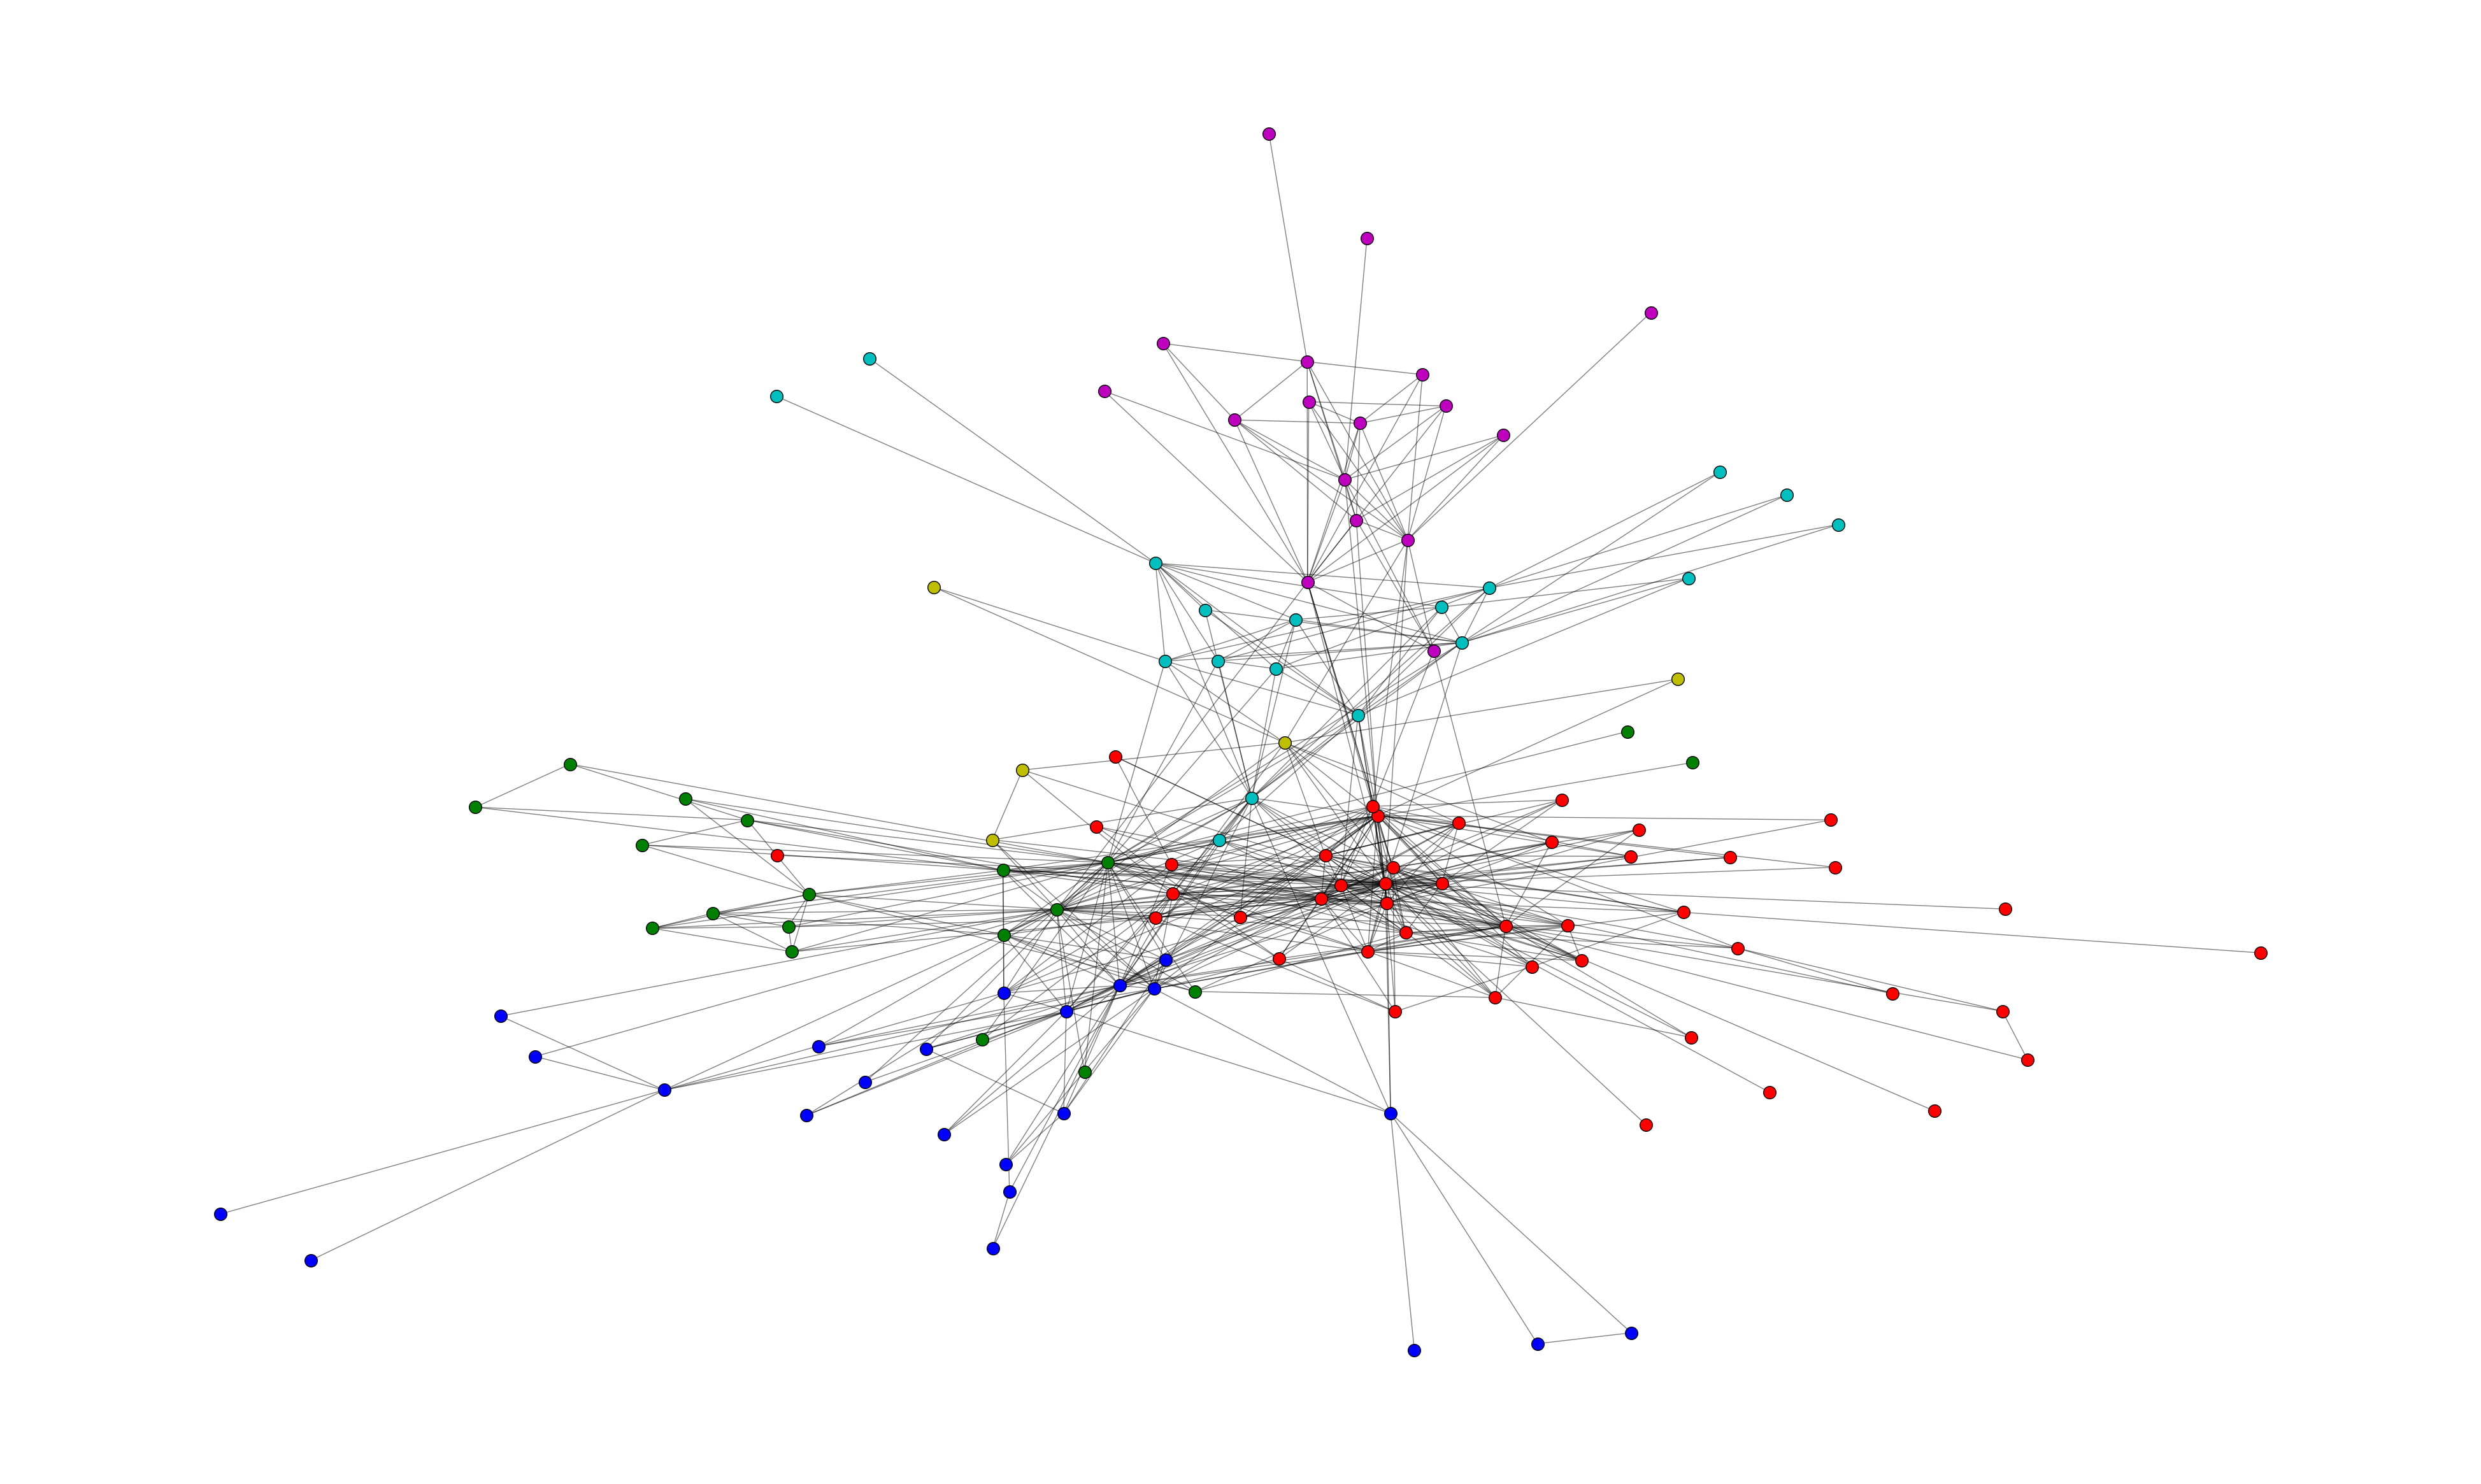

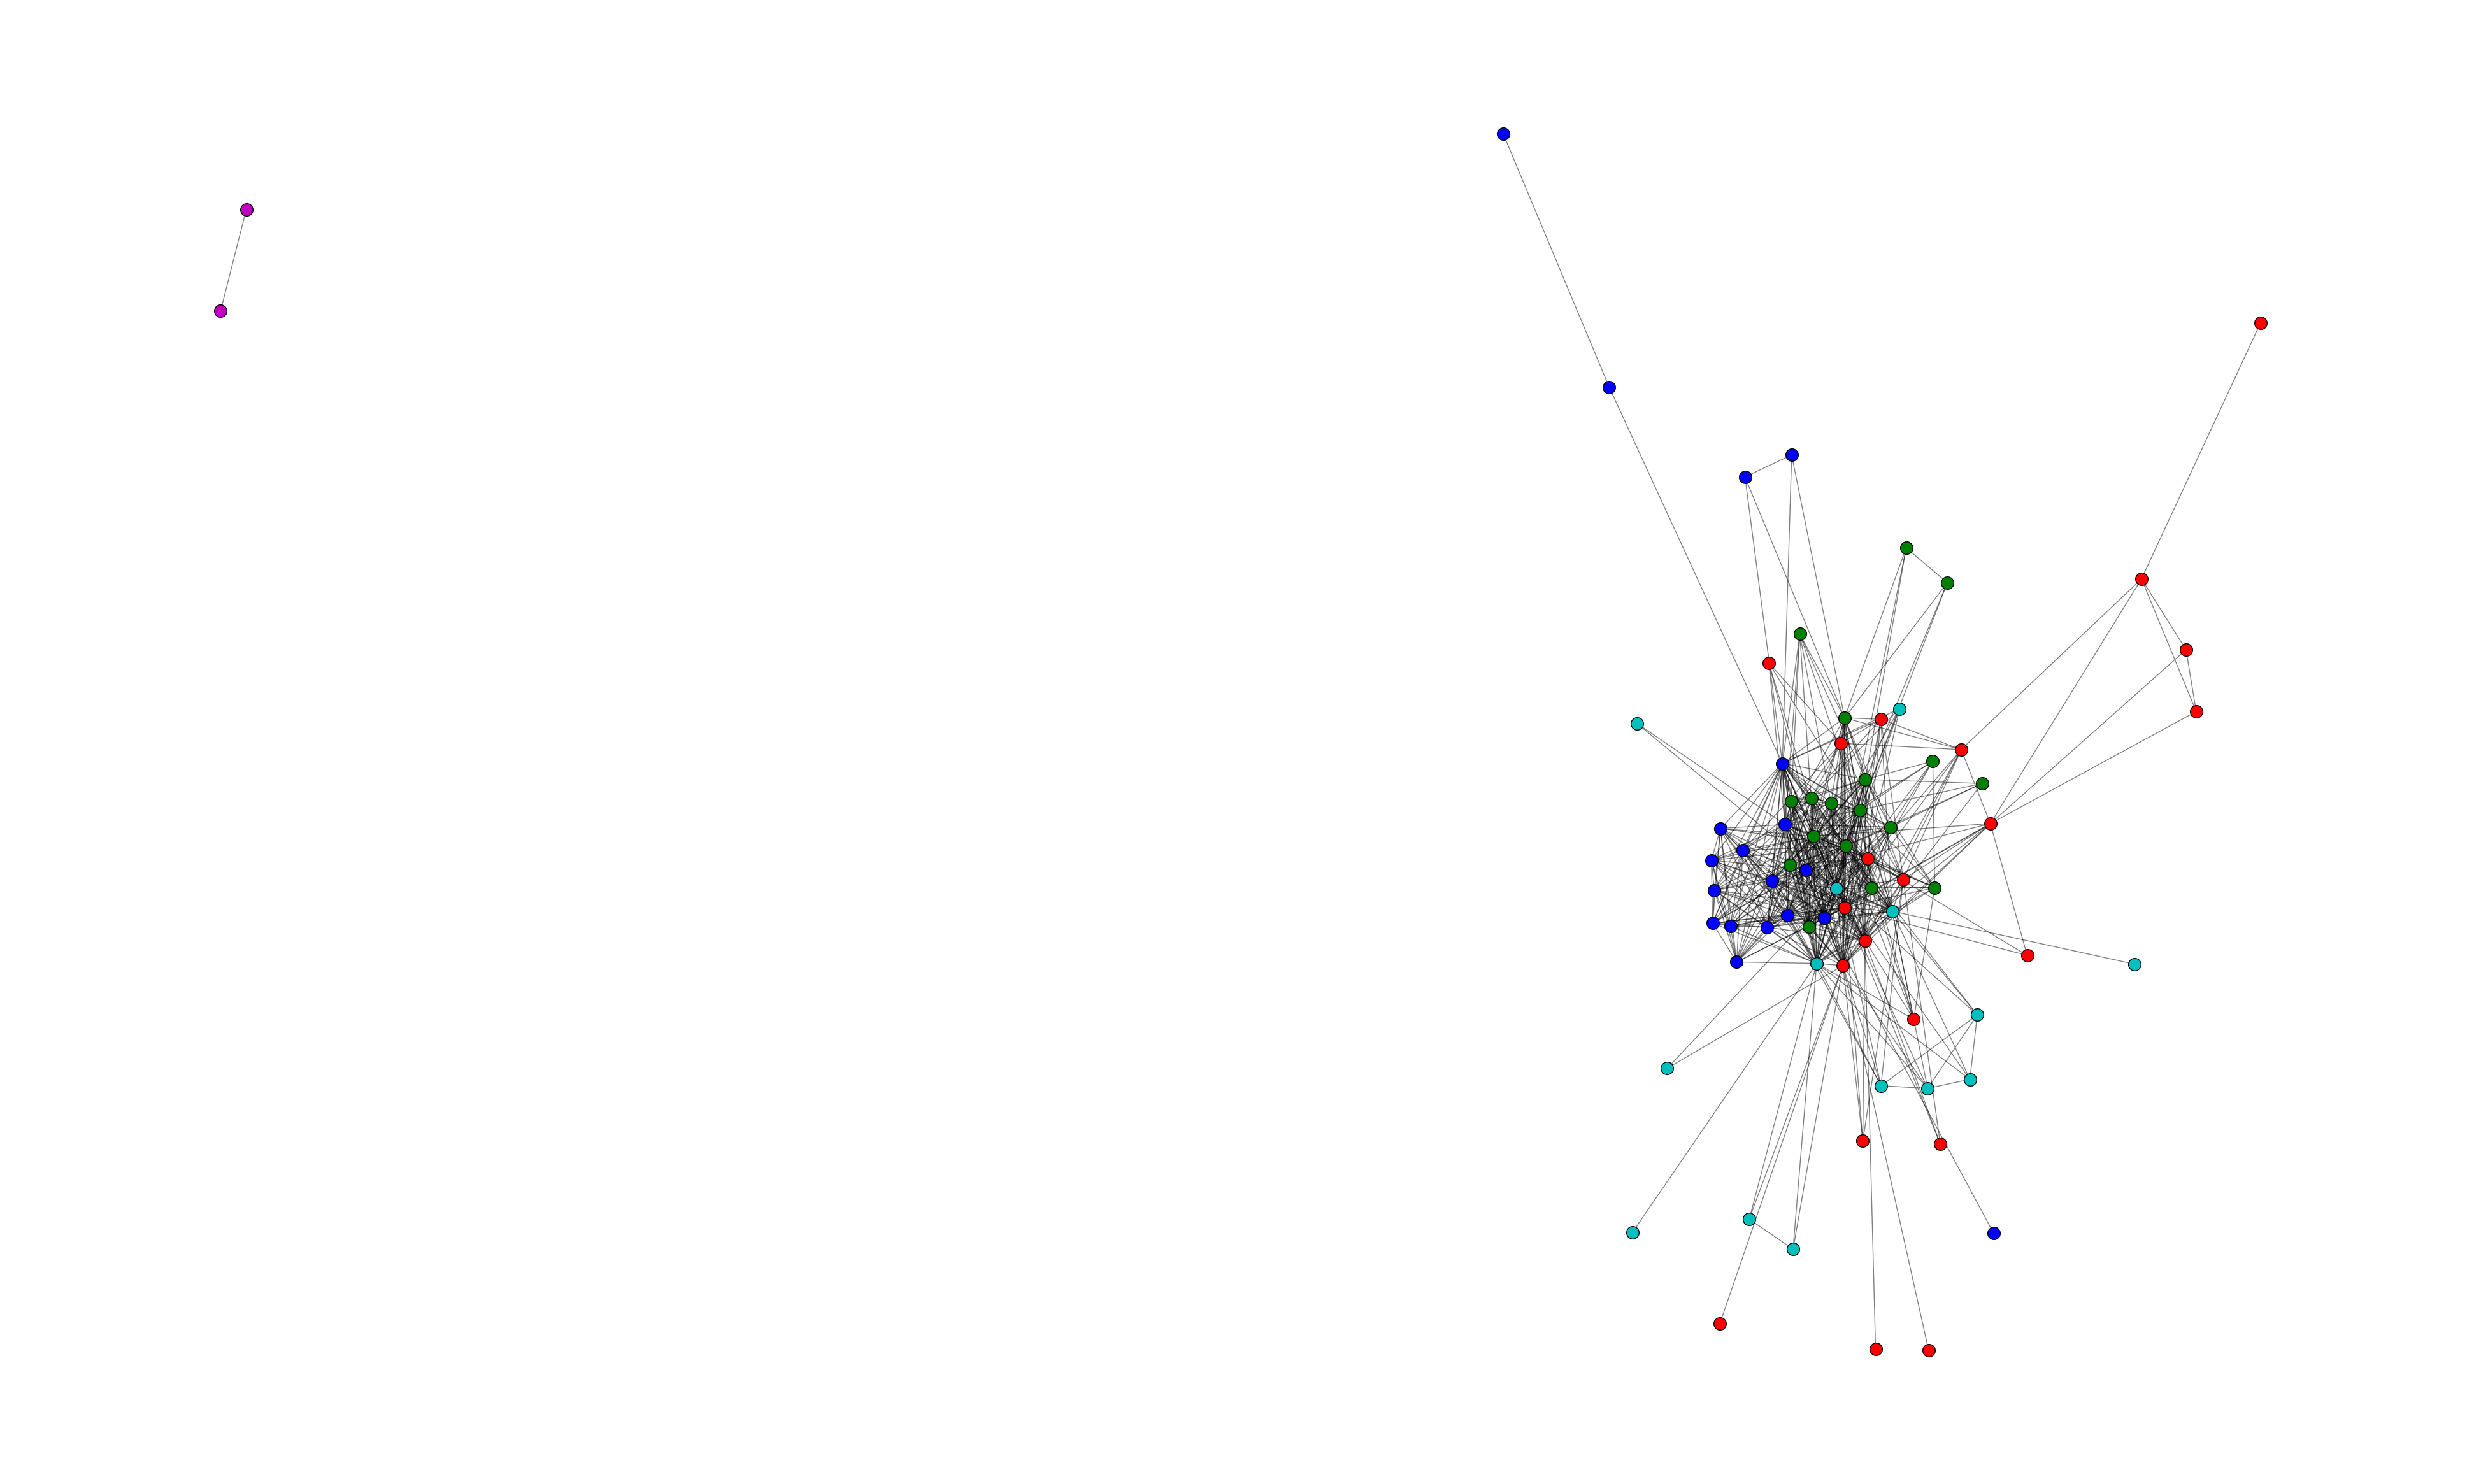

In [242]:
# Louvain
communities_graph_session_1 = algorithms.louvain(graph_session_1)
communities_graph_session_8 = algorithms.louvain(graph_session_8)

plot(graph_session_1, communities_graph_session_1,
     graph_session_1_positions, False)
plot(graph_session_8, communities_graph_session_8,
     graph_session_8_positions, False)

In [253]:
from cdlib import NodeClustering


def measure_similar_communities_between_graphs(left_side: NodeClustering, right_side: NodeClustering):
    similarities = {
        comunnity_name_on_right: {
            community_name_on_left: set(
                community_on_left).intersection(set(comunnity_on_right))
            for community_name_on_left, community_on_left in enumerate(left_side.communities)
        }
        for comunnity_name_on_right, comunnity_on_right in enumerate(right_side.communities)
    }
    txt = 'Similarities by intersection: \n'

    for community_name in similarities:
        community_size = len(right_side.communities[community_name])
        txt += f'Community {community_name} ({community_size}): \n'
        similar_items = similarities[community_name].items()

        for community_name_2, similarity in similar_items:
            items_between_communities =(
                set(left_side.communities[community_name_2])
                    .union(set(right_side.communities[community_name]))
            )
            total_itens_between_communities = len(items_between_communities)
            similarity_percentage = len(similarity) / total_itens_between_communities
            similarity_percentage = similarity_percentage * 100
            similarity_percentage = round(similarity_percentage, 2)

            if len(similarity) == 0:
                continue
            txt += f'   {similarity_percentage} - Community {community_name_2}: {similarity} \n'
        txt += '\n'
    txt += '\n'

    print(txt)



def compare_communities_between_graphs(right_side: NodeClustering, left_side: NodeClustering):
    for i, community in enumerate(right_side.communities):
        community.sort()
        print(f'Community Right: {i}: {community}')

    for i, community in enumerate(left_side.communities):
        community.sort()
        print(f'Community Left: {i}: {community}')

    equal_communities = []

    for i, community_1 in enumerate(right_side.communities):
        for j, community_2 in enumerate(left_side.communities):
            if set(community_1) == set(community_2):
                equal_communities.append((i, j))

    print('Equal communities:', equal_communities)


compare_communities_between_graphs(
    communities_graph_session_1, 
    communities_graph_session_8
)

measure_similar_communities_between_graphs(
    communities_graph_session_1, 
    communities_graph_session_8
)

Community Right: 1: ['ADDAM_MARBRAND', 'AERYS', 'ARYA', 'ASSASSIN', 'BAELOR', 'BALON', 'BARRISTAN', 'BENJEN', 'BERIC', 'BRAN', 'BRANDON_STARK', 'BRONN', 'CATELYN', 'CERSEI', 'GALBART_GLOVER', 'GENDRY', 'GREATJON_UMBER', 'HIGH_SEPTON', 'HODOR', 'HOT_PIE', 'HOUND', 'HUGH_OF_THE_VALE', 'ILYN_PAYNE', 'JAIME', 'JANOS', 'JOANNA', 'JOFFREY', 'JON', 'JONOS_BRACKEN', 'JON_ARRYN', 'JORY_CASSEL', 'KEVAN', 'LANCEL', 'LEO_LEFFORD', 'LITTLEFINGER', 'LOMMY_GREENHANDS', 'LORAS', 'LYANNA', 'LYSA', 'MACE', 'MAESTER_LUWIN', 'MARILLION', 'MASHA_HEDDLE', 'MERYN_TRANT', 'MHAEGEN', 'MORD', 'MOUNTAIN', 'MYCAH', 'MYRCELLA', 'NED', 'OLD_NAN', 'OSHA', 'PYCELLE', 'RENLY', 'RHAEGAR', 'RICKARD_KARSTARK', 'RICKARD_STARK', 'RICKON', 'ROBB', 'ROBERT', 'ROBIN', 'RODRIK', 'ROOSE_BOLTON', 'ROS', 'SANSA', 'SEPTA_MORDANE', 'SHAE', 'SHAGGA', 'STABLE_BOY', 'STANNIS', 'STEFFON', 'SYRIO_FOREL', 'THEON', 'TOBHO_MOTT', 'TOMARD', 'TOMMEN', 'TYRION', 'TYSHA', 'TYWIN', 'VARDIS_EGEN', 'VARLY', 'VARYS', 'WAYMAR_ROYCE', 'WILL', 'YOREN

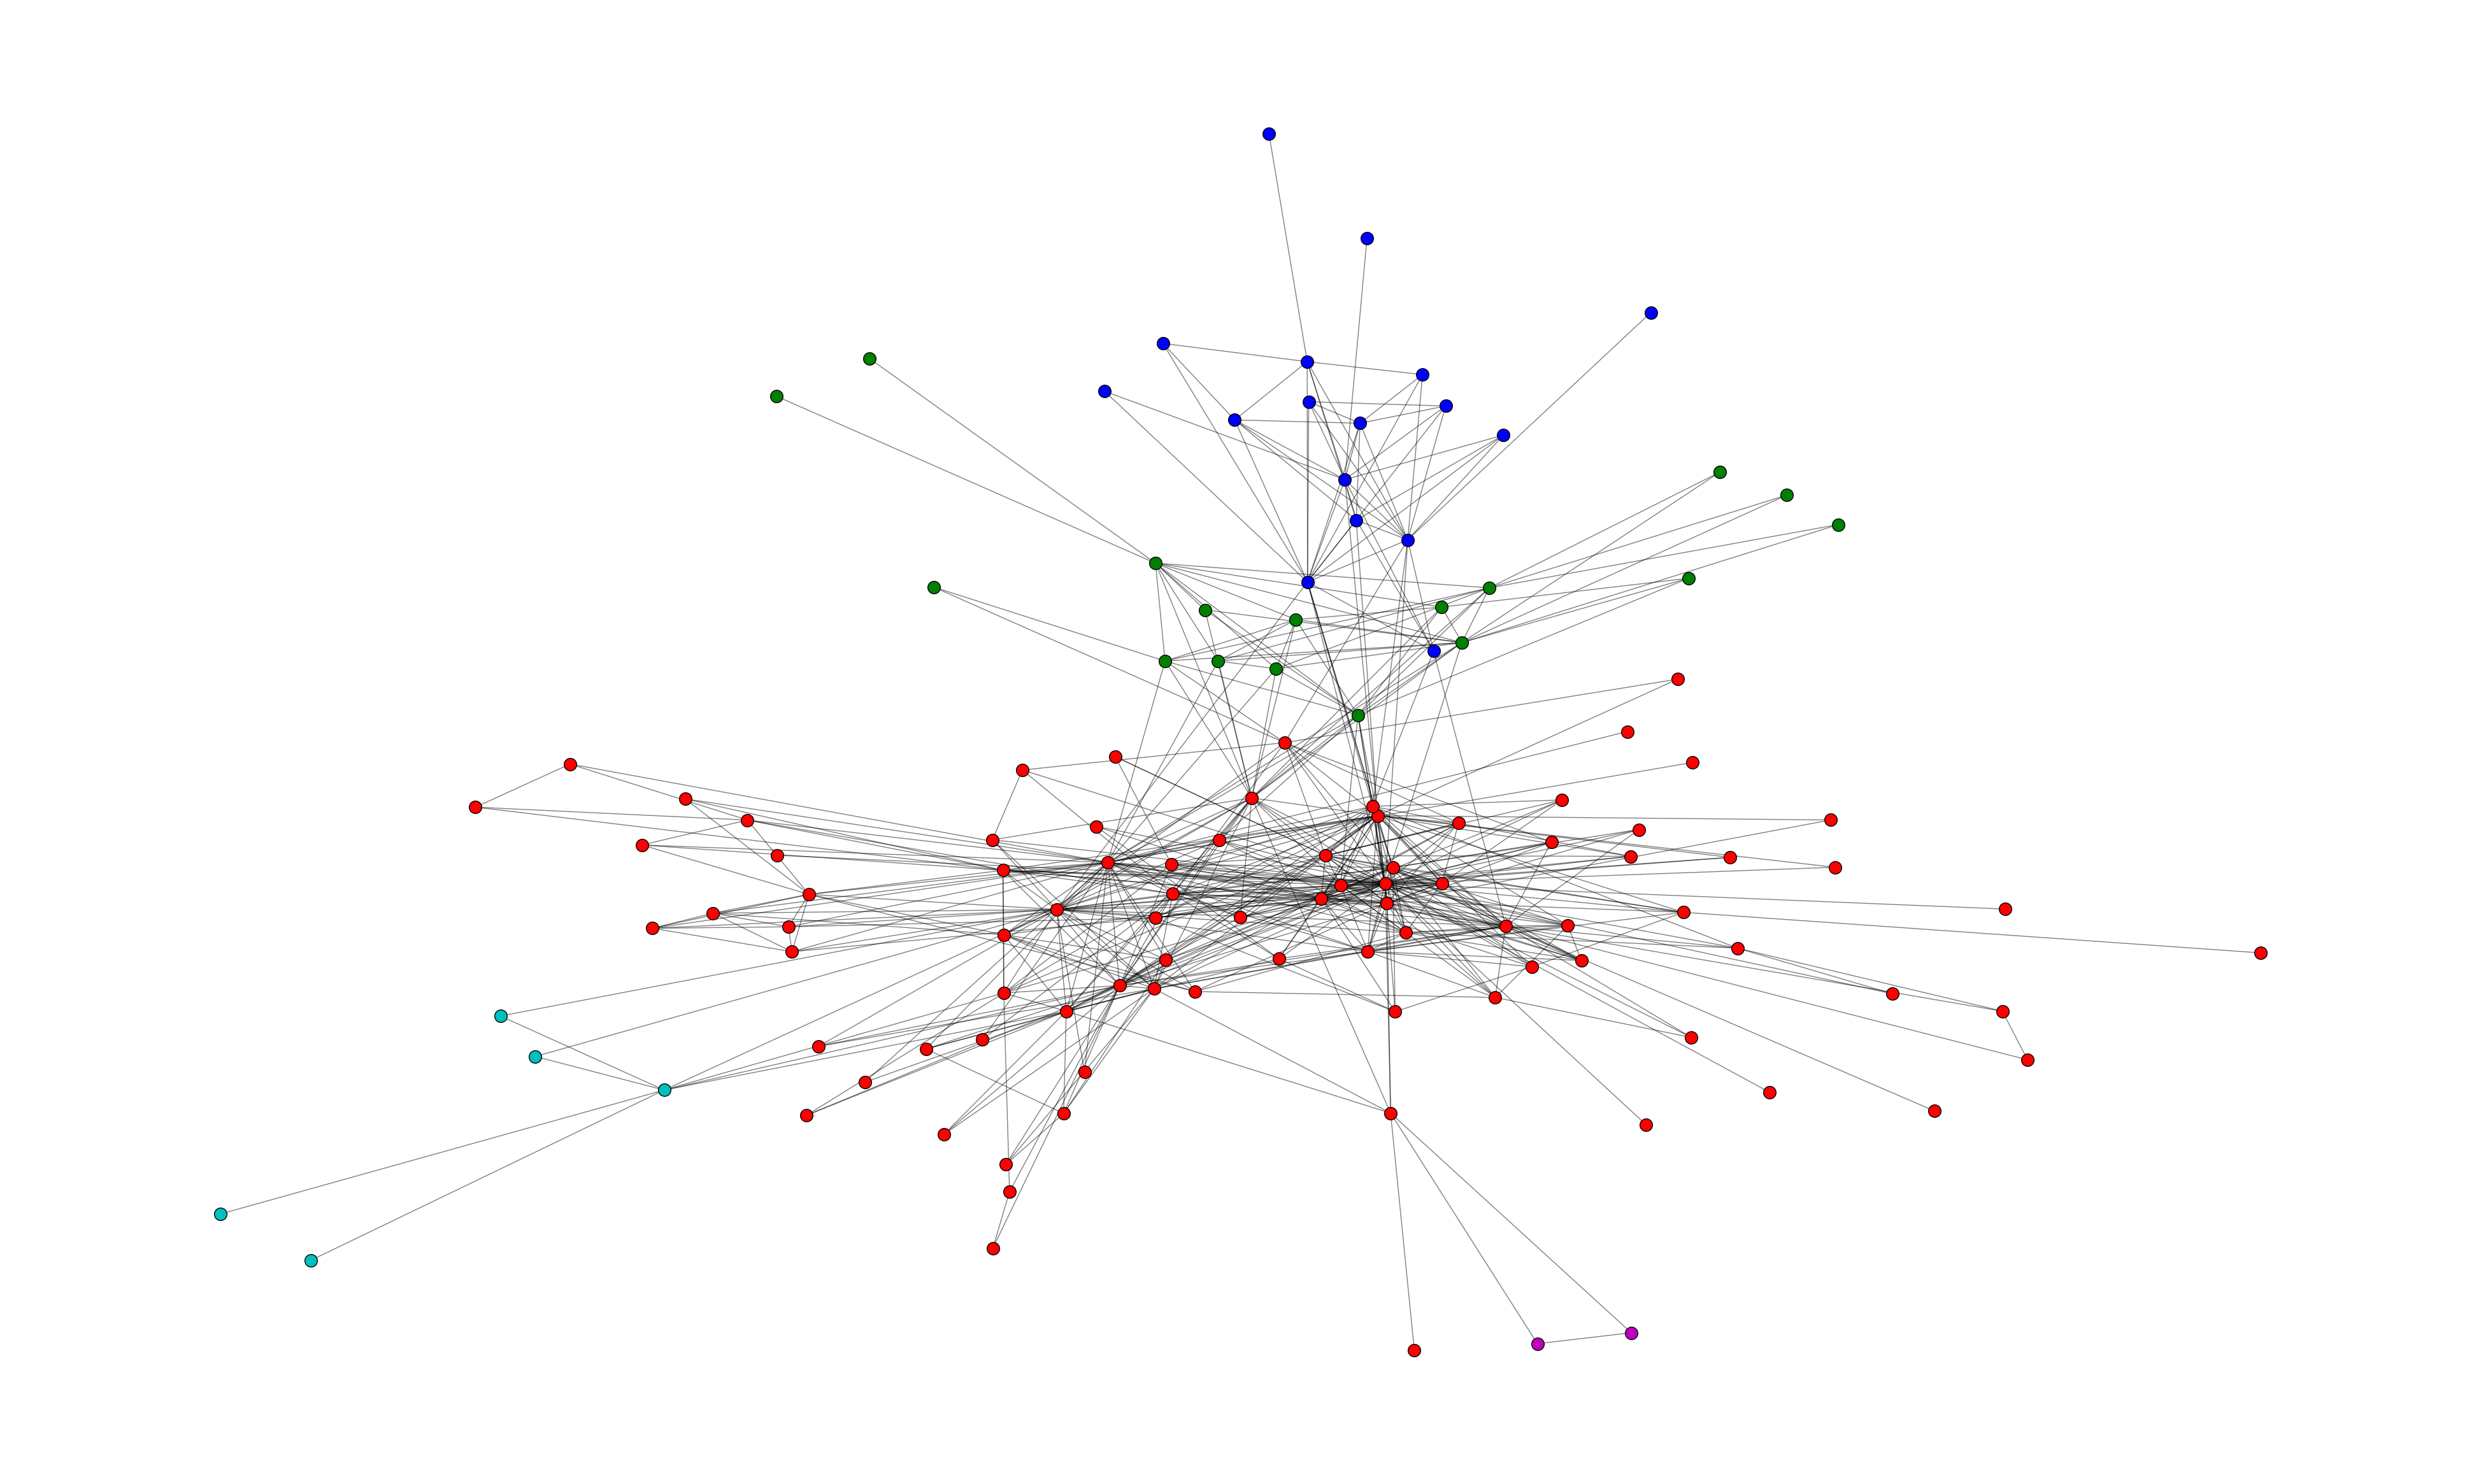

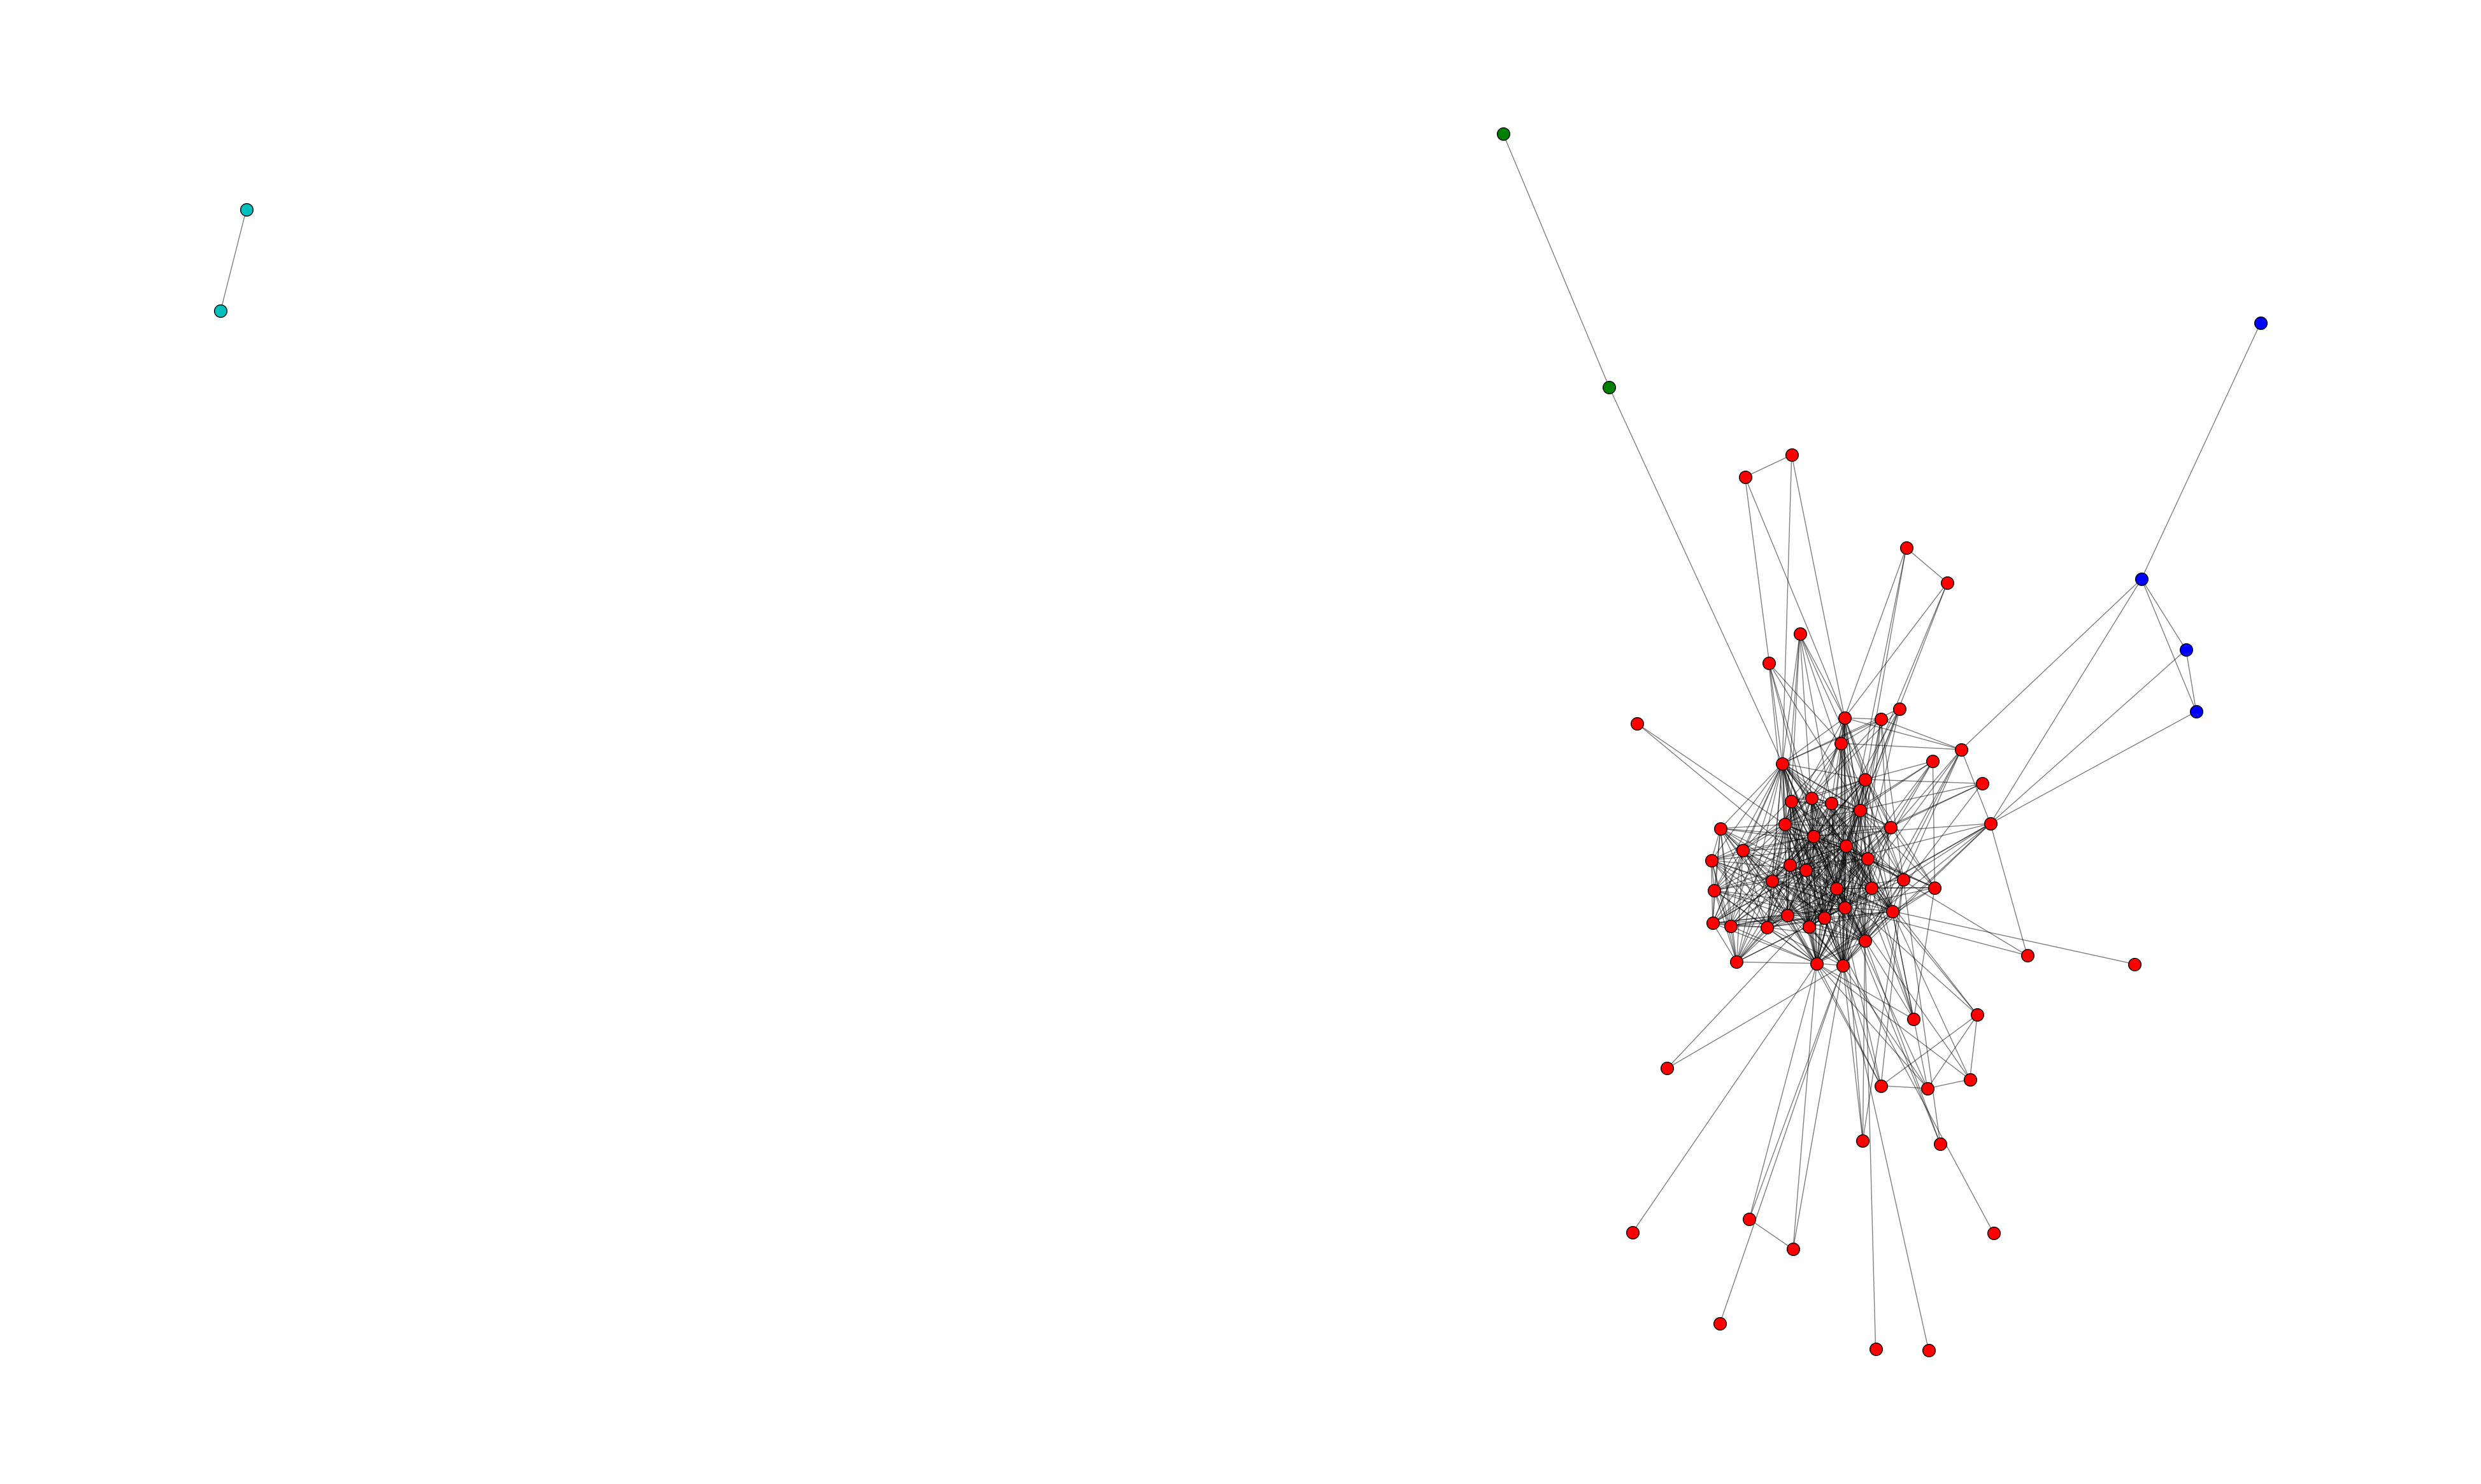

In [244]:
# use label propagation

communities_graph_session_1 = algorithms.label_propagation(graph_session_1)
communities_graph_session_8 = algorithms.label_propagation(graph_session_8)

plot(graph_session_1, communities_graph_session_1,
     graph_session_1_positions, False)
plot(graph_session_8, communities_graph_session_8,
     graph_session_8_positions, False)

In [245]:
compare_communities_between_graphs(
    communities_graph_session_1,
    communities_graph_session_8
)

measure_similar_communities_between_graphs(
    communities_graph_session_1,
    communities_graph_session_8
)

Community Right: 1: ['ADDAM_MARBRAND', 'AERYS', 'ARYA', 'ASSASSIN', 'BAELOR', 'BALON', 'BARRISTAN', 'BENJEN', 'BERIC', 'BRAN', 'BRANDON_STARK', 'BRONN', 'CATELYN', 'CERSEI', 'GALBART_GLOVER', 'GENDRY', 'GREATJON_UMBER', 'HIGH_SEPTON', 'HODOR', 'HOT_PIE', 'HOUND', 'HUGH_OF_THE_VALE', 'ILYN_PAYNE', 'JAIME', 'JANOS', 'JOANNA', 'JOFFREY', 'JON', 'JONOS_BRACKEN', 'JON_ARRYN', 'JORY_CASSEL', 'KEVAN', 'LANCEL', 'LEO_LEFFORD', 'LITTLEFINGER', 'LOMMY_GREENHANDS', 'LORAS', 'LYANNA', 'LYSA', 'MACE', 'MAESTER_LUWIN', 'MARILLION', 'MASHA_HEDDLE', 'MERYN_TRANT', 'MHAEGEN', 'MORD', 'MOUNTAIN', 'MYCAH', 'MYRCELLA', 'NED', 'OLD_NAN', 'OSHA', 'PYCELLE', 'RENLY', 'RHAEGAR', 'RICKARD_KARSTARK', 'RICKARD_STARK', 'RICKON', 'ROBB', 'ROBERT', 'ROBIN', 'RODRIK', 'ROOSE_BOLTON', 'ROS', 'SANSA', 'SEPTA_MORDANE', 'SHAE', 'SHAGGA', 'STABLE_BOY', 'STANNIS', 'STEFFON', 'SYRIO_FOREL', 'THEON', 'TOBHO_MOTT', 'TOMARD', 'TOMMEN', 'TYRION', 'TYSHA', 'TYWIN', 'VARDIS_EGEN', 'VARLY', 'VARYS', 'WAYMAR_ROYCE', 'WILL', 'YOREN

### O número de comunidades é o mesmo em ambos os casos?

Não, o número de comunidades é diferente em ambos os casos, para a primeira temporada temos 5 comunidades e para a oitava temporada temos 4 comunidades

### A partir de uma análise visual, é possível identificar uma comunidade similar (em termos de personagens) em ambas as temporadas?

Sim, a comunidade 1 da primeira temporada é similar a comunidade 0 da oitava temporada, com os personagens:

'THEON', 'ROBERT', 'BRONN', 'TYWIN', 'BRAN', 'HOUND', 'VARYS', 'ROBIN', 'JON', 'TYRION', 'JAIME', 'JOFFREY', 'AERYS', 'BERIC', 'ARYA', 'MOUNTAIN', 'CERSEI', 'RHAEGAR', 'CATELYN', 'GENDRY', 'SANSA', 'LYANNA', 'NED'